###### Principal Component Analysis - Part 1
Ôn lại kiến thức Linear Algebra, Statistics và ý nghĩa toán học, PCA steps 

1. Dimensionality Reduction (giam chieu du lieu)
2. Algebra
- Norm 2 of matrix
- Vector in different dimensions
- expected value and covariance matrix (gia tri ki vong & hiep phuong sai)
    - one-dimensional data
    - multi-dimensional data
3. PCA

In reality, feature vectors might have a huge number of dimensions and there is a huge number of data points

=> difficulties in saving and computation

Solution: Dimensionality Reduction - an important technique in ML, one of data compression techniques

Dimensionality Reduction: find a function having initial data point $\mathscr{x} \in \mathscr{R}^D$ (D is huge) and create a new data point $\mathscr{z} \in \mathscr{R}^K$ with a number of dimensions K < D

Principal Component Analysis (PCA): 
- the simplest solution among Dimensionality Reduction algorithms based on a linear model.
- dựa trên quan sát rằng data thường không random distribution trong không gian, mà thường phân bố gần các đường/mặt đặc biệt nào đó. 
- consider a special case khi those special linear spaces là các không gian con (sub-space) 

###### Norm 2 of matrix 
Assume $||x||_\alpha$ is a norm of vector $x$, we have matrix A's norm: $||A||_\alpha = max_x \frac{||A_x||_\alpha}{||x||_\alpha}$

Matrix A có thể không vuông, nên no. of columns is not equal to no. of dimensions of $x$. Như vậy tính toán matrix's norm cũng là việc giải bài toán tối ưu. 

Chú ý: hàm tối ưu có nominator và denominator là vectors' norms 

Matrix's Norm 2 được định nghĩa là: $||A||_2 = max_x \frac{||Ax||_2}{||x||_2}$

Assume the denominator $||x||_2=1$: $||A||_2 = max_{||x||_2=1} ||Ax||_2$

In other words, we need to find $x$: $x = argmax_x ||Ax||^2_2 \space s.t.: ||x||^2_2 = 1$ (3)

Norm 2 được square để tránh dấu square root. Using Lagrange as constraint is an equation: $\mathscr{L}(x,\lambda) = ||Ax||^2_2 + \lambda(1 - ||x||^2_2)$

$\frac{\partial L}{\partial \lambda} = 1 - ||x||^2_2 = 0$

$\frac{\partial L}{\partial x} = 2A^T Ax - 2\lambda x = 0 <=> A^T Ax = \lambda x <=> x^T A^T Ax = \lambda x^T x = \lambda$ 

$x^T A^T Ax$ chính là $||Ax||^2_2$ chính là hàm mục tiêu trong (3). Vậy hàm mục tiêu đạt max khi $\lambda$ đạt max. In other words, $\lambda$ là giá trị riêng lớn nhất của $A^T A$ hay chính là singular value lớn nhất của matrix A.

Như vậy, matrix's norm 2 là max singular value của matrix đó. Và nghiệm của (3) là right-singular vector ứng với singular value đó. 

Lý luận tương tự, suy ra $min_{||x||_2=1}x^T A^T Ax$ có nghiệm là vector riêng ứng với trị riêng nhỏ nhất của $A^T A$. Khi đó function đạt min = chính giá trị riêng nhỏ nhất này. 

###### Biểu diễn Vector trong các hệ cơ sở khác nhau 
Trong không gian D chiều, xác định toạ độ mỗi điểm dựa trên 1 hệ toạ độ nào đó. Ở các hệ toạ độ khác nhau, toạ độ mỗi điểm cũng khác nhau. 

A set of vectors $e_1,...,e_D$ mà mỗi $e_d$ có 1 element $\ne$ 0 ở thành phần thứ d và phần tử đó = 1, được goi là hệ cơ sở đơn vị trong không gian D chiều. Nếu xếp vectors $e_d, d = 1,2,...,D$ theo đúng thứ tự đó, ta sẽ được ma trận đơn vị (identity matrix) D chiều.

Mỗi vector cột $x = [x_1, x_2,...,x_D] \in \mathscr{R}^D$, biểu diễn của nó trong hệ đơn vị: $x = x_1e_1 + x_2e_2 + ... + x_De_D$

Giả sử có 1 hệ cơ sở khác $u_1, u_2,...,u_D$ (các vector này độc lập tuyến tính), biểu diễn của vector x trong hệ cơ sở mới: $x = y_1u_1 + y_2u_2 + ... + y_Du_D = Uy$

vector $u_d$: cột thứ d của matrix U

vector y: biểu diễn của x trong hệ cơ sở mới

Bộ các số $y_d, d = 1,2,...,D$ là duy nhất vì y: $y = U${-1}x$

U: ma trận khả nghịch vì columns của nó độc lập tuyến tính 

Ma trận trực giao: $I = U^TU$, được quan tâm nhiều hơn vì nghịch đảo của chúng chính là chuyển vị của chúng: $U^{-1} = U^T$ 

$y = U${-1}x <=> y = U^Tx => y_i = x^Tu_i = xu^T_i, i = 1,2,...,D$

Vector 0 được biểu diễn như nhau trong mọi hệ cơ sở.

Việc chuyển đổi hệ cơ sở sử dụng ma trận trực giao (orthogonal matrix) coi như 1 phép xoay trục toạ độ. Nói cách khác, đây cũng chính là 1 phép xoay vector dữ liệu theo chiều ngược lại. 

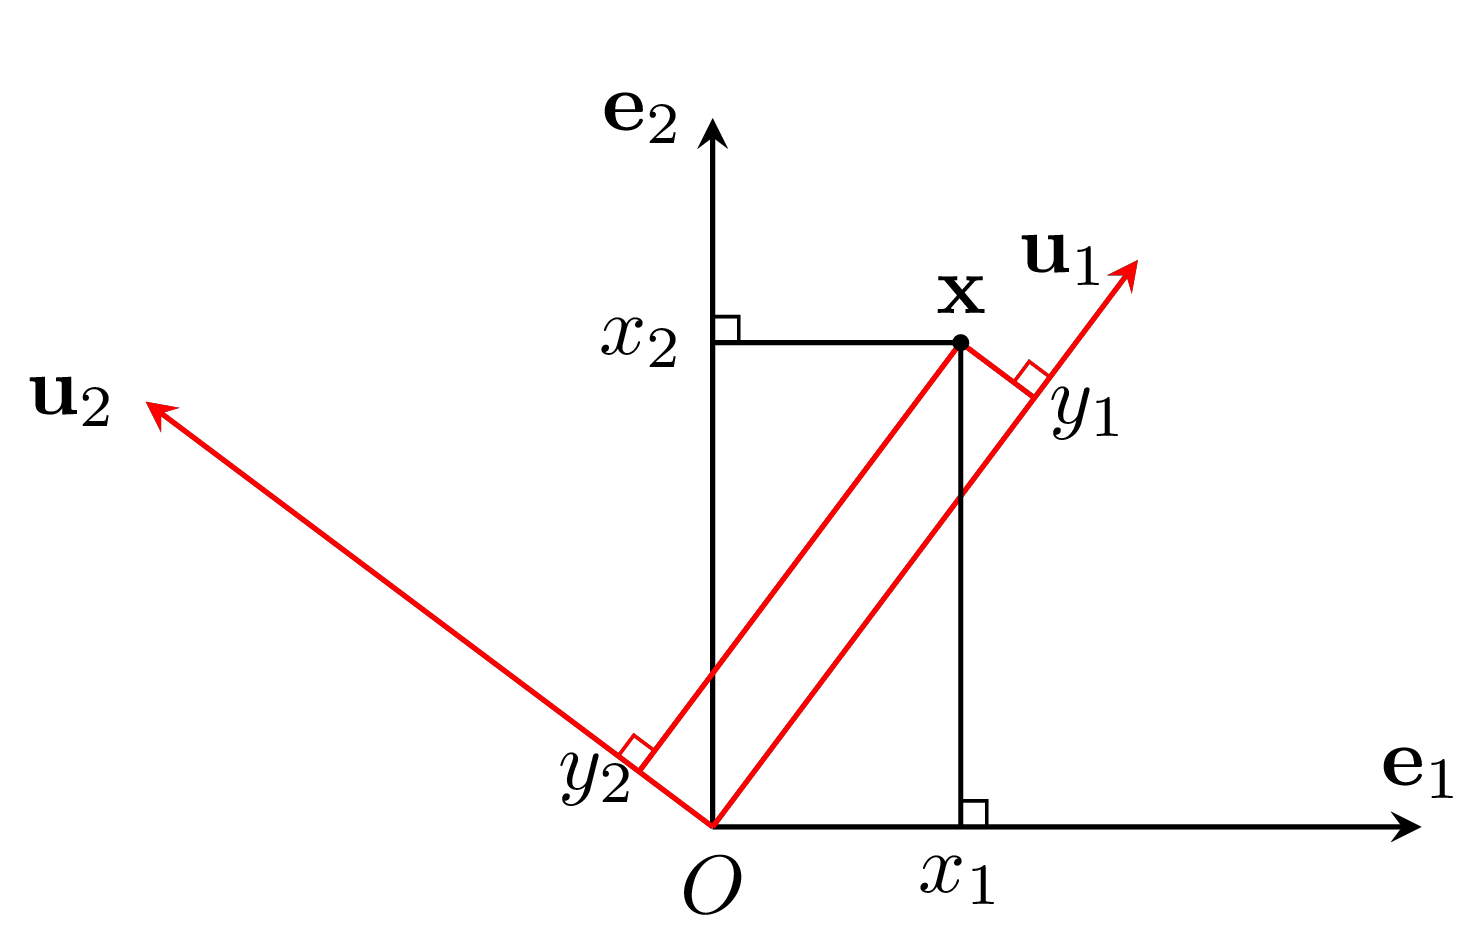

###### Hàm số trace 
Trace function xác định trên a set of square matrices được dùng rất nhiều trong optimization. Trace function trả về a sum of elements trên đường chéo của 1 matrix vuông. 

Giả sử matrices trong Trace function là vuông và các phép nhân matrix thực hiện được: 
- trace(A) = trace($A^T$)
- trace(k A) = k trace(A)
- trace(A B) = trace(B A)
- $||A||^2_F = trace(A^TA) = trace(A^T) w.r.t A: ma trận bất kỳ, có thể không vuông$
- $trace(A) = \sum^D_{i=1} \lambda_i$ w.r.t A: square matrix và $\lambda_i, i = 1,2,...,N$ là toàn bộ các giá trị riêng của nó, có thể phức hoặc lặp. Việc chứng minh tính chất này có thể được dựa trên matrix đặc trưng của A và định lý Vièt. 

###### Expected vector and variance matrix
1. one-dimensional data: expected value, variance 

N giá trị $x_1, x_2,...,x_N$

$\bar x = \frac{1}{N}\sum^N_{n=1}x_n = \frac{1}{N}X1$

$\sigma^2 = \frac{1}{N}\sum^N_{n=1}(x_n - \bar x)^2$

$1 \in R^N$: vector cột chứa toàn phần tử 1

Variance càng nhỏ thì data points càng gần với expected value, tức data points càng giống nhau. Variance càng lớn thì dữ liệu càng có tính phân tán.

2. multi-dimensional data: expected vector, covariance matrix

N điểm dữ liệu biểu diễn bởi column vectors $x_1,...,x_N$

$\bar {\mathscr{x}} = \frac{1}{N}\sum^N_{n=1}\mathscr{x_n}$

$S = \frac{1}{N}\sum^N_{n=1}(x_n - \bar {\mathscr{x}})(x_n - \bar {\mathscr{x}})^T = \frac{1}{N}\hat{\mathscr{X}}\hat{\mathscr{X}}^T$

$\hat x_n = x_n - \bar {\mathscr{x}}$: trừ mỗi cột của X đi $\bar x$


- Covariance matrix: ma trận đối xứng và là ma trận nửa xác định dương
- Mọi phần tử trên đường chéo (diagonal) của covariance matrix $\ge$ 0, và là variance từng dimension của data
- Các phần từ ngoài đường chéo $s_{ij},i \ne j$ thể hiện tương quan (correlation) giưã thành phần i và j của data, còn gọi lại covariance. Cov = 0: 2 thành phần i, j trong data là uncorrelated. 
- Nếu covariance matrix là diagonal matrix, data hoàn toàn uncorrelated giữa các chiều.

Ví dụ về uncorrelated và correlated data.

Expected value và Variance in one-dimensional space

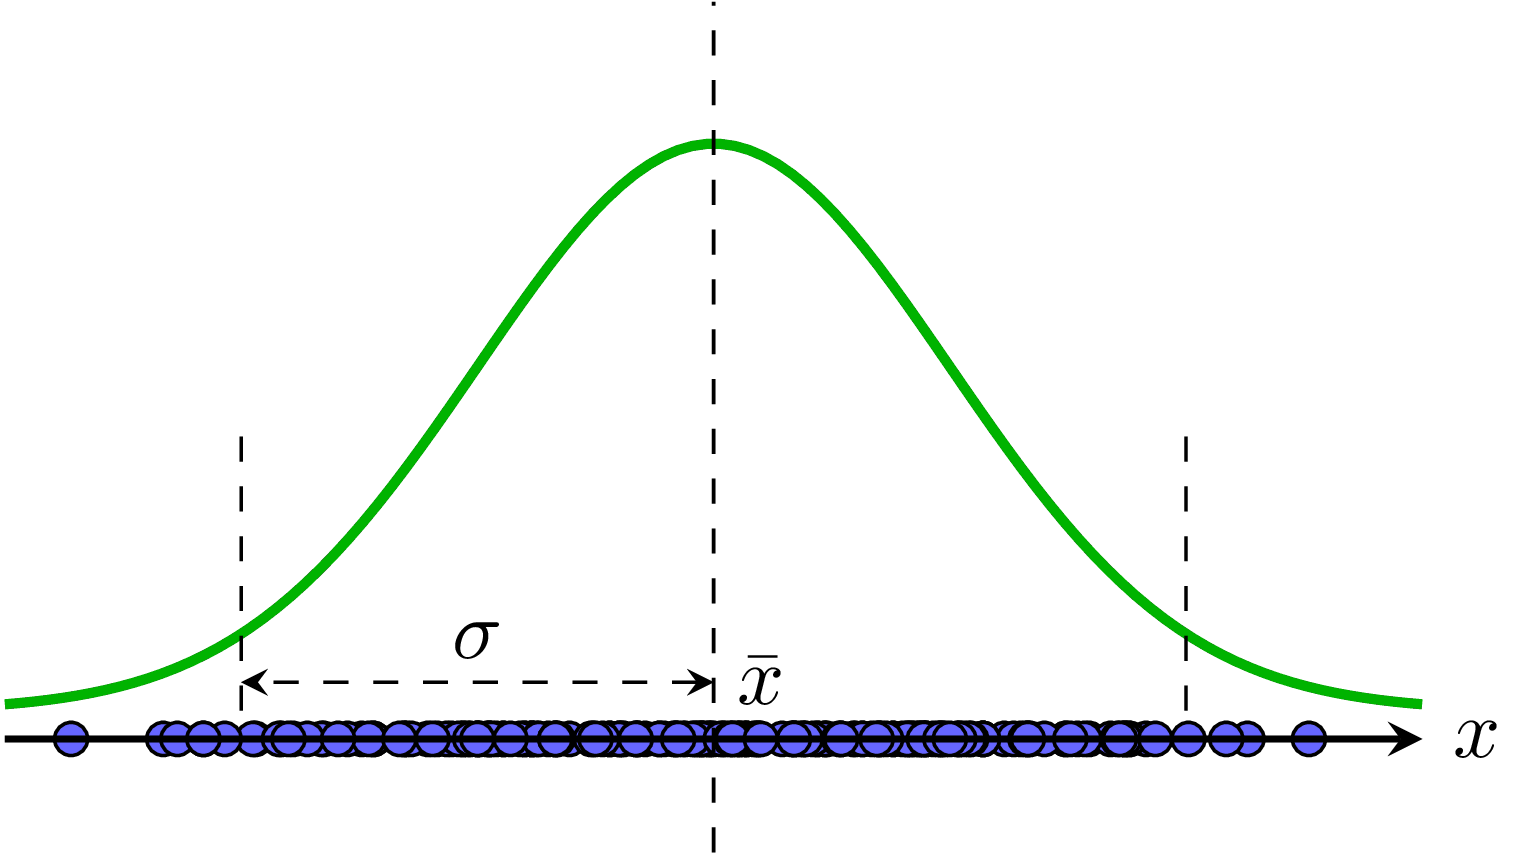

2-dimensional space mà 2 uncorrelated dimensions. Covariance matrix: diagonal matrix với 2 elements trên diagonal là $\sigma_1, \sigma_2$, đây cũng là 2 Eigen values của covariance matrix và variance của mỗi chiều dữ liệu.
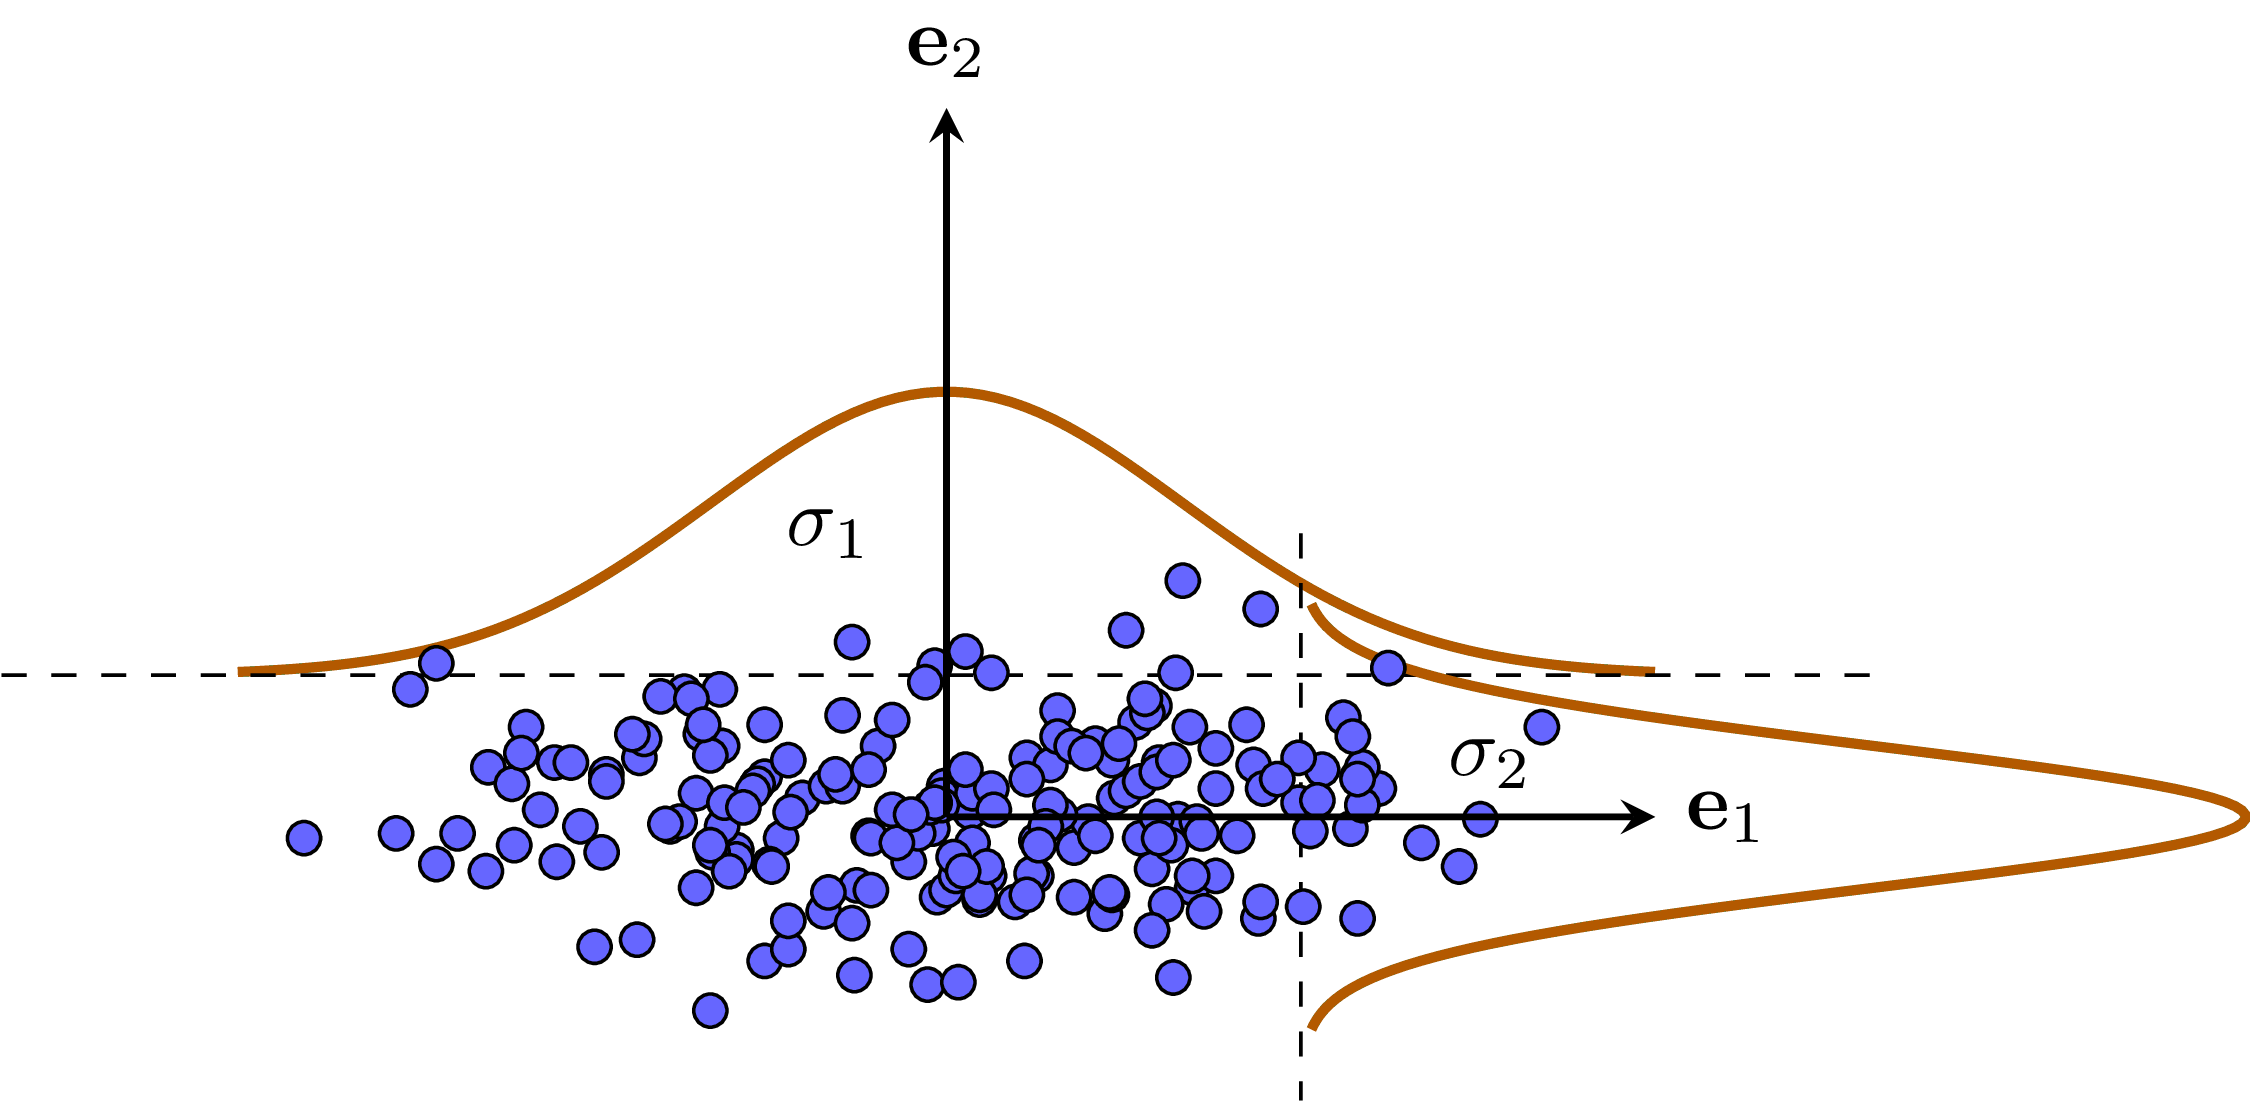

2-dimensional correlated space. Theo mỗi chiều, ta có thể tính được expected value và variance. Variance càng lớn thì data trong chiều đó càng phân tán. Trong hình, data của 2nd-dimension phân tán nhiều hơn so với của 1st-dimension 
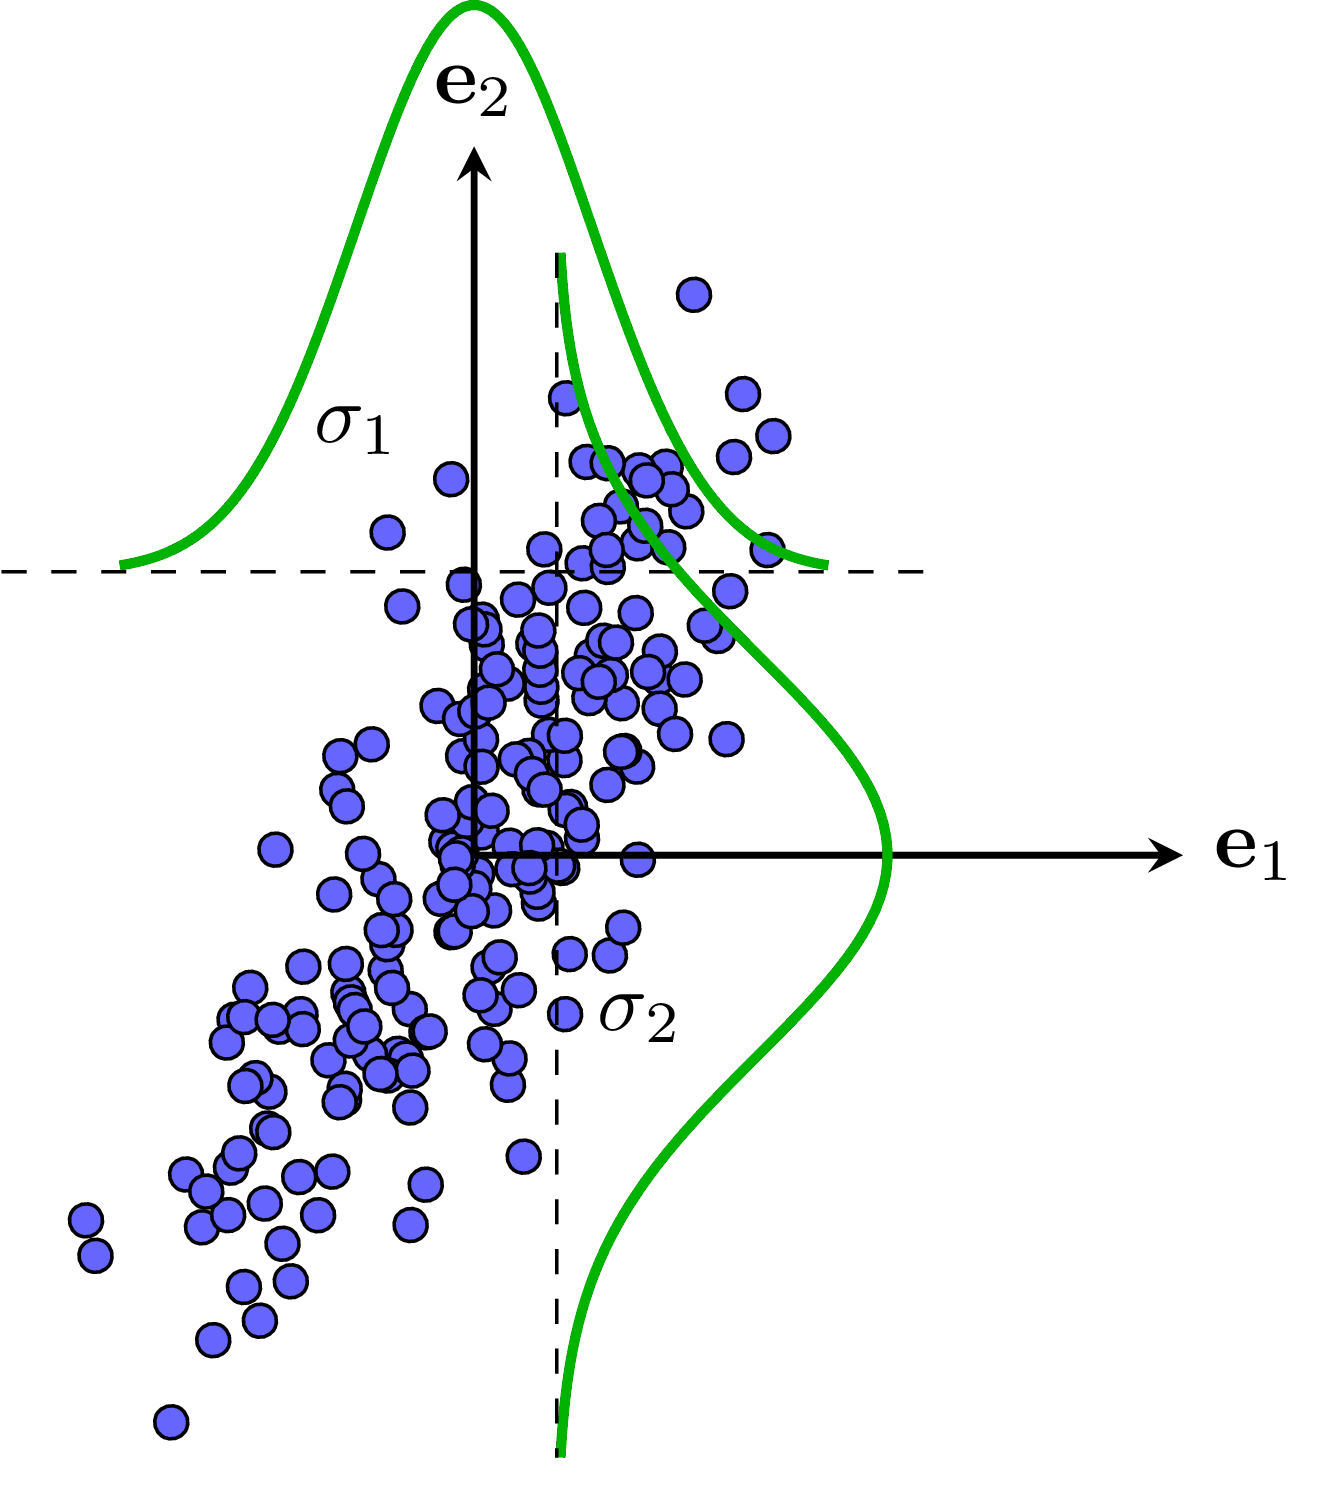

Eigen value: trị riêng

Eigen vector: vector riêng

$A \succ 0$: xác định dương, A $\succeq 0$: (positive semi-definite) nếu cá trị riêng của nó không âm

Diagonal matrix: ma trận đường chéo 

Degree matraix: ma trận bậc, là 1 diagonal matrix chứa thông tin về bậc của mỗi đỉnh. Trong một đồ thị vô hướng, điều này có nghĩa là mỗi vòng lặp (cạnh xuất phát và kết thúc cùng một đỉnh) sẽ có giá trị bậc là 2. Trong một đồ thị có hướng, thuật ngữ bậc có thể là bậc vào (indegree, số cạnh đến ở mỗi đỉnh) hoặc bậc ra (outdegree, số cạnh đi ra từ mỗi đỉnh).

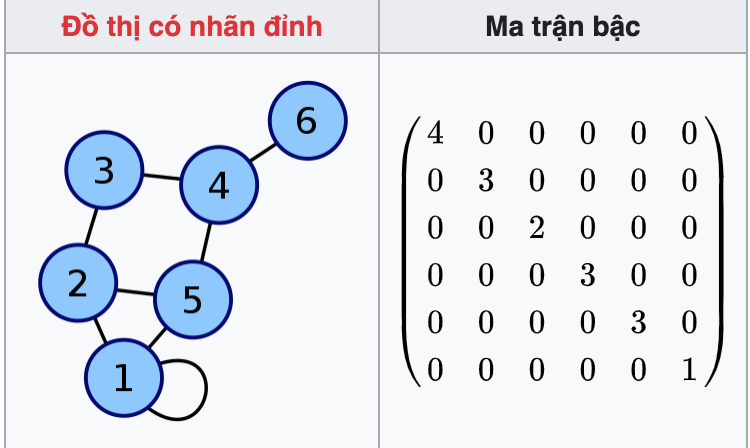

Trong đó, đỉnh số 1 có giá trị bậc là 4 (do có một vòng lặp nên tính là 2), đỉnh số 2 có giá trị bậc là 3 (kết nối với 3 cạnh) và các giá trị khác trên đường chéo ma trận tương ứng với số cạnh được kết nối ở mỗi đỉnh.

###### Principal Component Analysis
Orthonormal basic: Hệ cơ sở trực chuẩn 

Orthogonal system: Hệ trực giao 

Generalization: tính tổng quát 

New basis: cơ sở mới

Cooridnates in new basis: toạ độ trong cơ sở mới 

Column vector: vector cột, Row vector: vector hàng 

Objective function: hàm mục tiêu 

Expected/mean vector: vector kỳ vọng 

Data vector: vector dữ liệu 

b: bias 

Normalized data: dữ liệu đã chuẩn hoá 

Positive semi-definite matrix: ma trận nửa xác định dương 

Positive definite matrix: ma trận xác định dương 

Symmetric matrix: ma trận đối xứng

Cách đơn giản nhất để giảm chiều data từ D về K (K<D) là chỉ lại K phần tử quan trọng nhất. Thử thách: chưa biết xác định thành phần nào là quan trọng hơn, or in the worst case, lượng thông tin mà mỗi thành phần là như nhau, bỏ đi thành phần nào cũng dẫn đến mất 1 lượng lớn thông tin. 

Tuy nhiên, nếu có thể biểu diễn initial data vectors trong một hệ cơ sở mới, trong đó, tầm quan trọng giữa components là khác nhau rõ rệt, thì có thể bỏ less important components.

Ví dụ, 2 camera (đặt phía trước và trên đầu) chụp 1 người. Rõ ràng, camera phía trước mang nhiều thông tin hơn. Vì vậy, image chụp trên đầu có thể bỏ qua mà không bị mất quá nhiều thông tin về hình dáng người.

PCA: phương pháp tìm 1 hệ cơ sở mới sao cho thông tin chủ yếu tập trung ở một vài toạ độ. Để đơn giản trong tính toán, PCA sẽ tìm 1 hệ trực chuẩn để làm cơ sở mới.

Giả sử U: new orthonormal basic và ta muốn giữ lại K toạ độ trong hệ cơ sở mới này mà không mất tính tổng quát, chẳng hạn, most important components nằm trong K thành phần đầu tiên. 

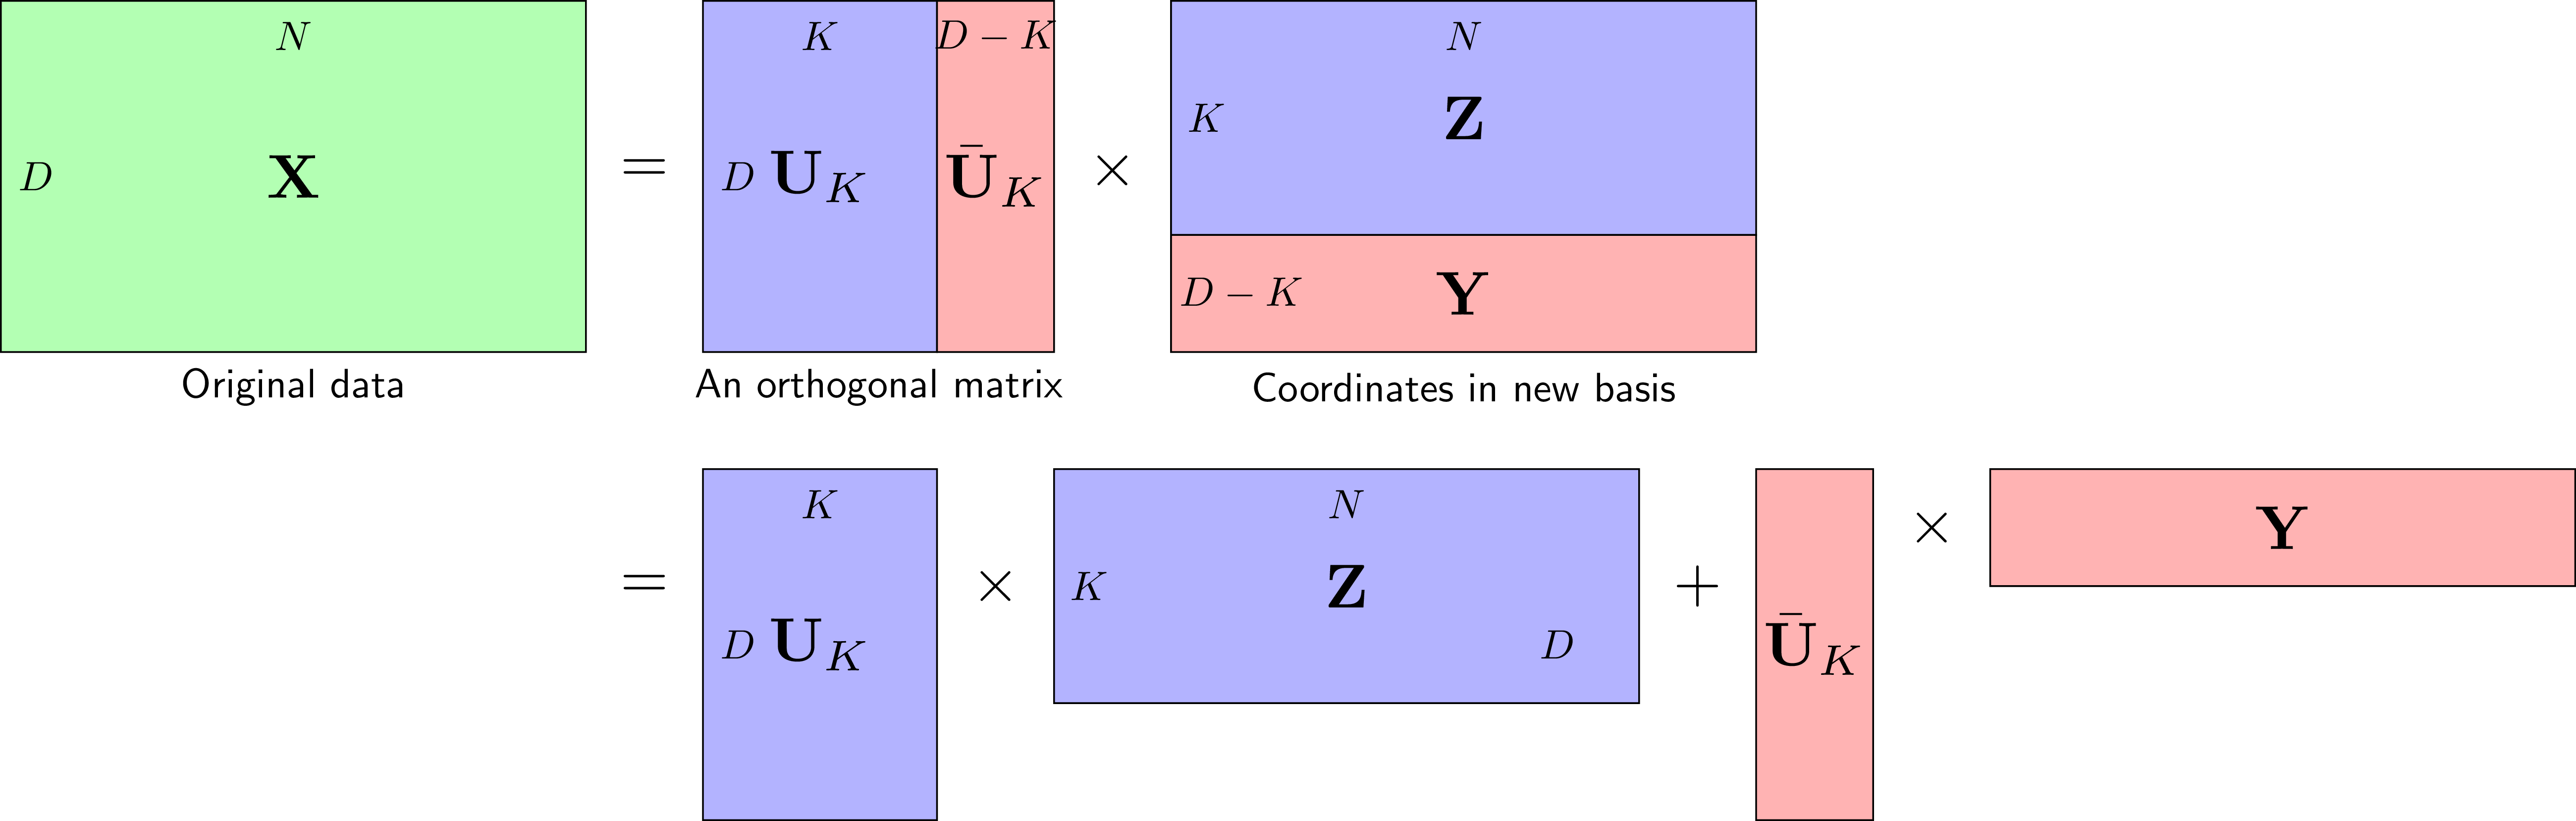

Cơ sở mới $U = [U_K, \bar U_K]$ là 1 hệ trực chuẩn với $U_K$: ma trận con tạo bởi K cột đầu tiên của U. Với new basis này, data matrix: 

$X = U_K Z + \bar U_K Y$ (original data = np.dot(orthogonal matrix, coordinates in new basis)) (8)

$=> \begin{bmatrix} Z \\ Y \end{bmatrix} = \begin{bmatrix} U^T_K \\ \bar U^T_K \end{bmatrix} X => Z = U^T_K X Y = \bar U^T_K X$ (9)

Mục đích PCA là tìm orthogonal matrix U sao cho phần lớn information được giữ lại ở $U_K Z$(màu xanh) và $\bar U_K Y$ (màu đỏ) sẽ được lược bỏ và thay bằng 1 matrix không phụ thuộc vào từng điểm dữ liệu.

Nói cách khác, ta sẽ xấp xỉ Y bởi 1 matrix có toàn bộ columns như nhau. Chú ý, columns này có thể phụ thuộc vào training data, nhưng không phụ thuộc vào test data.

Gọi mỗi cột đó là b và có thể coi nó là bias, ta sẽ xấp xỉ: $Y \approx b 1^T$

Trong đó, $1^T \in R^{1xN}$: vector hàng có toàn bộ elements = 1.

Giả sử đã tìm được U, ta cần tìm b thoả mãn: $b = argmin_b||Y - b1^T||^2_F = argmin_b||\bar U^T_K X - b 1^T||^2_F$

Derivative theo b của objective function = 0: 

$ (b 1^T - \bar U^T_K X)1 = 0$ 

=> $ Nb = \bar U^T_K X1 $ 

=> $ b = \bar U^T_K \bar x $

Việc tính toán sẽ tiện hơn nếu vector kỳ vọng $\bar x = 0$. Việc này đạt được nếu từ đầu, (data vector - expected vector) của toàn bộ dữ liệu. Đây là các bước đầu tiên của PCA.

Với giá trị b tìm được, initial data sẽ xấp xỉ với: $X \approx \bar X = U_K Z + \bar U_K \bar U^T_K \bar x 1^T$ (10)

Combine (8),(9),(10) to define the main loss function: $J = \frac{1}{N}||X - \bar X||^2_F = \frac{1}{N}||\bar U_K \bar U^T_K X - \bar U_K \bar U^T_K \bar x 1^T||^2_F$ (11)

Nếu columns của 1 matrix V tạo thành 1 trực chuẩn thì với 1 matrix W bất kỳ, ta có: $||VW||^2_F = trace(W^TV^TVW) = trace(W^TW) = ||W||^2_F$

Vì vậy loss function (11) viết lại thành:

$J = \frac{1}{N}||\bar U^T_K(X - \bar x 1)^T||^2_F = \frac{1}{N}||\bar U^T_K \hat X||^2_F = \frac{1}{N}||\hat X^T \bar U_K||^2_F $

$= \frac{1}{N} \sum^D_{i=K+1}||\hat X^T u_i||^2_2 = \frac{1}{N}\sum^D_{i=K+1} u^T_i \hat X \hat X^T u_i = \sum^D_{i=K+1} u^T_i S u_i$ (12)

Với $\hat X = X - \bar x 1^T$ và covariance matrix S, ta gọi matrix $\hat X$ là zero-corrected data hoặc normalized data. Có thể nhận thấy $\hat x = x_n - \bar x$

Công việc còn lại là tìm các $u_i$ để mất mát là nhỏ nhất. 

Định nghía covariance matrix $S = \frac{1}{N}\bar X^T \bar X$, U: orthogonal matrix bất kì, thay K = 0 vào (12):

$L = \sum^D_{i=1} u^T_i S u_i = \frac{1}{N}||\hat X^T U||^2_F = \frac{1}{N}trace(\hat X^T U U^T \hat X)$ (12) 

$= \frac{1}{N} trace(\hat X^T \hat X)$ (13)

Với $\lambda_1 \ge \lambda_2 \ge ... \ge \lambda_2 \ge 0$ là các trị riêng (Eigen values) thực và không âm của positive semi-definite matrix S.

Như vậy L không phụ thuộc vào cách chọn orthogonal matrix U và L = sum(elments trên diagonal của S). In other words, L = sum(variance theo từng component của initial data).

Vì vậy, việc tối thiểu loss function J (13) <=> việc tối đa: $F = L - J = \sum^K_{i=1} u_i S u^T_i$

Theorem 1: $F max = \sum^K_{i=1} \lambda_i$ khi $\u_i$ là các vector riêng (Eigen vectors) có norm 2 = 1 ứng với Eigen values này; không quên điều kiện trực giao giữa các $u_i$

Chú ý, $\lambda_i, i = 1,...,K$ chính là K Eigen values lớn nhất của covariance matrix S. Largest Eigen value $\lambda_1$ của matrix này gọi là Thành Phần Chính Thứ Nhất (First Principal Component), Eigen value thứ hai $\lambda_2$ gọi là Thành Phần Chính Thứ Hai (Second Principal Component), etc. 

Vì vậy, phương pháp này gọi là Principal Component Analysis: chỉ giữ lại K thành phần chính của data khi muốn giảm số dimension. 

Ví dụ: trong Statistics, PCA được xem là phương pháp đi tìm 1 orthonormal basis đóng vai trò 1 phép xoay, sao cho trong hệ cơ sở mới này, variance theo một chiều nào đó là rất nhỏ và có thể bỏ qua. 
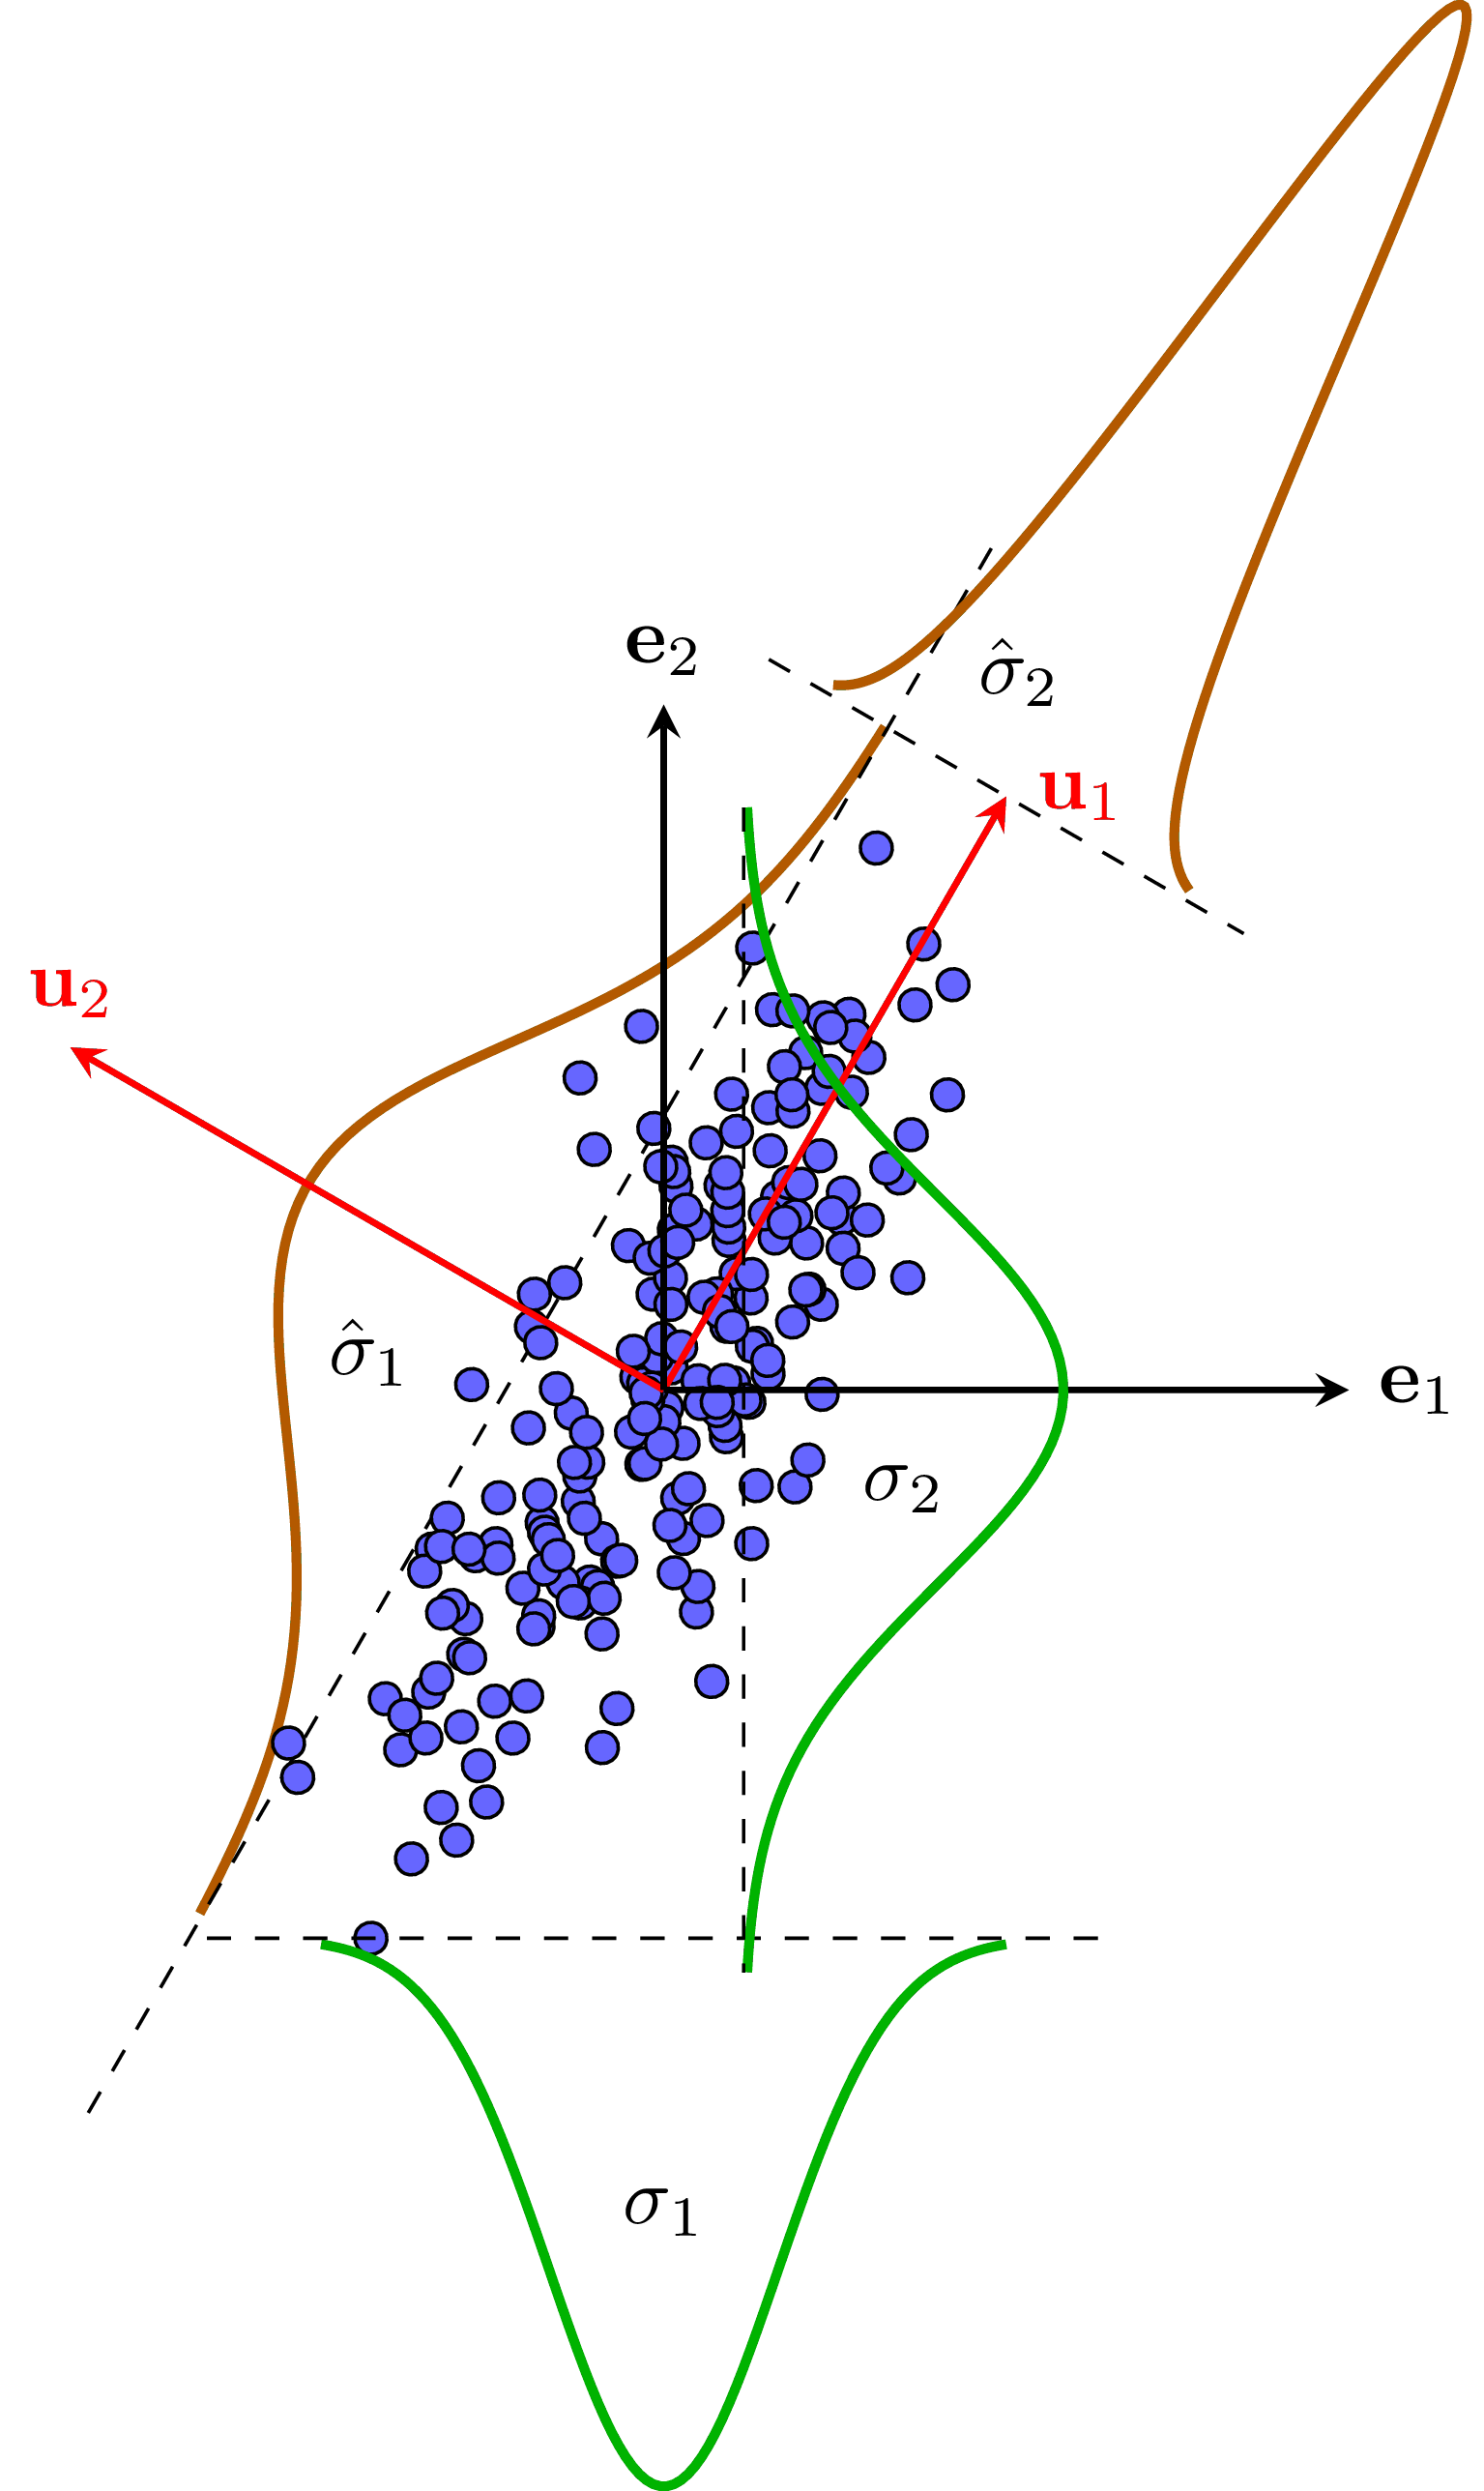

base vector: vector cơ sở 

Original space: không gian ban đầu 

Coordinate: toạ độ 

Coordinates: hệ toạ độ 

Error term (u): phần sai số

Objective function: hàm mục tiêu

Optimization problem: bài toán tối ưu 

$u_2^T$: transpose of vector $u_2$

Trong không gian ban đầu với base vectors $e_1, e_2$, variance theo mỗi dimension đều lớn. Trong new space, base vectors $u_1, u_2$, variance theo 2nd dimension: $\hat \sigma_2$ rất nhỏ so với $\hat \sigma_1$. Điều này nghĩa là khi chiếu data lên $u_2$, ta được các điểm rất gần nhau và gần với kỳ vọng (expected) theo chiều đó. In this case, expected theo mọi dimension = 0, nên có thể thay thế toạ độ theo dimension $u_2 = 0$. Nếu data có variance càng nhỏ theo 1 dimension nào đó thì khi $\approx$ dimension đó = 1 hằng số, sai số xảy ra càng nhỏ. 

PCA là đi tìm 1 phép xoay tương ứng với 1 orthogonal matrix sao cho trong hệ toạ độ mới, tồn tại dimensions có variance nhỏ đến nỗi có thể bỏ qua; chỉ cần giữ lại dimensions/components khác quan trọng hơn. 

Như đã chứng minh ở trên, sum(varriances theo mọi dimensions) trong hệ cơ sở nào cũng như nhau và = sum(Eigen values của covariance matrix). Vì vậy, PCA là phương phá giảm số chiều data mà giữ được sum(variances còn lại) là lớn nhất. 

Khi K = 1, ta cần giải: $max_{u_1} u^T_1 S u_1$ w.s.t ||u_1||_2 = 1

Objective function đạt giá trị lớn nhất = $\lambda_1$ khi $u_1$: Eigen vector của covariance matrix S tương ứng với Eigen value $\lambda_1$. Vậy định lý đúng với K = 1.

Giả sử $u_1$ đã là Eigen vector với Eigen value lớn nhất của S, thì $u_2$ của bài toán tối ưu: $max_{u_2} u^T_2 S u_2$ w.s.t $||u_2||_2 = 1$ (21) , $u^T_2 u_1 = 0$

$u_2$ là 1 Eigen vector của S ứng với Eigen value lớn thứ 2 $\lambda_2$ của nó. Chú ý, $\lambda_2$ có thể = $\lambda_1$ nếu không gian riêng ứng với $\lambda_1$ có số rank > 1.

Chứng minh bằng nhân tử Lagrange của bài toán (21):
$L(u_2,v_1,v_2) = u^t_2 S u_2 + v_1 u^T_1 u_2 + v_2(1 - u^T_2 u_2)$

Take derivative:

$\frac{\partial L}{\partial v_1} = u^T_1 u_2 = 0$

$\frac{\partial L}{\partial v_2} = 1 - u^T_2 u_2 = 0$ <=> $u_2^Tu_2 = 1$

$\frac{\partial L}{\partial u_2} = 2S u_2 + v_1 u_1 -2 v_2 u_2 = 0$ (22) <=> $u^T_1(2Su_2 + v_1u_1 - 2v_2u_2) = 0$

<=> $2u^T_1Su_2 + v_1u_1^T - 2v_2u_1^Tu_2 = 0$ <=> $2u_1^TSu_2 + v_1 -2v_2 0 = 0$ 

<=> $2u_1^TSu_2 + v_1 = 0$

Vì $Su_1 = \lambda_1u_1 => u_1^TSu_2 = \lambda_1u_1^Tu_2 = \lambda_1 = 0 => v_1 = 0$

(22) <=> $2Su_2 + 0u_1 - 2v_2u_2 = 0$ <=> $Su_2 = v_2u_2$ <=> transpose: $u_2^T Su_2 = v_2$

Vậy $u_2$ là 1 Eigen vector của S ứng với $v_2$.

Để objective function đạt max, $v_2$ càng lớn càng tốt. Dẫn đến $v_2$ phải là Eigen value thứ hai của S.

Lập luận tương tự, ta chứng minh được: Nếu $u_i, i = 1,2,...,k-1$ là Eigen vectors ứng với Eigen values lớn thứ i của positive semi-definite matrix S, và k-1 Eigen vectors tạo thành 1 hệ trực chuẩn, vậy: 

$max_{u_k} u^T_k S u_k$ w.s.t $u_k^Tu_k = 1$;  $u^T_k u_i = 1$, i = 1,...,k-1 

bằng đúng với Eigen value tiếp theo $\lambda_k$ tại $u_k$ (Eigen vector ứng với Eigen value này).

###### Các bước thực hiện PCA
1. mean vector: $\bar x = \frac{1}{N}\sum^N_{n-1} x_n$
2. trừ mỗi điểm với mean vector: $\hat x_n = x_n - \bar x$ 
3. covariance matrix: $S = \frac{1}{N} \hat X \hat X^T$
4. eigenvalues and eigenvectors of S with norm = 1, descending order by eigenvalues: $(\lambda_1,u_1),...,(\lambda_D,u_D)$. Remember the orthonormality of $u_i$
5. pick K eigenvectors w. highest eigenvalues to build a matrix $U_K$ w. columns tạo thành 1 hệ trực giao (orthogonal system). K eigenvectors, còn gọi là main components, tạo thành 1 không gian con (sub space) gần với distribution của dữ liệu ban đầu đã chuẩn hoá (normalized initial data)
6. chiếu dữ liệu ban đầu đã chuẩn hoá $\hat X$ xuống không gian con tìm được (project data to selected eigenvectors)
7.dữ liệu mới là toạ độ data points trên không gian mới (projected points in low dimension): $Z = U^T_K \hat X$

Initial data được tính xấp xỉ theo new data: $x \approx U_KZ + \bar x$


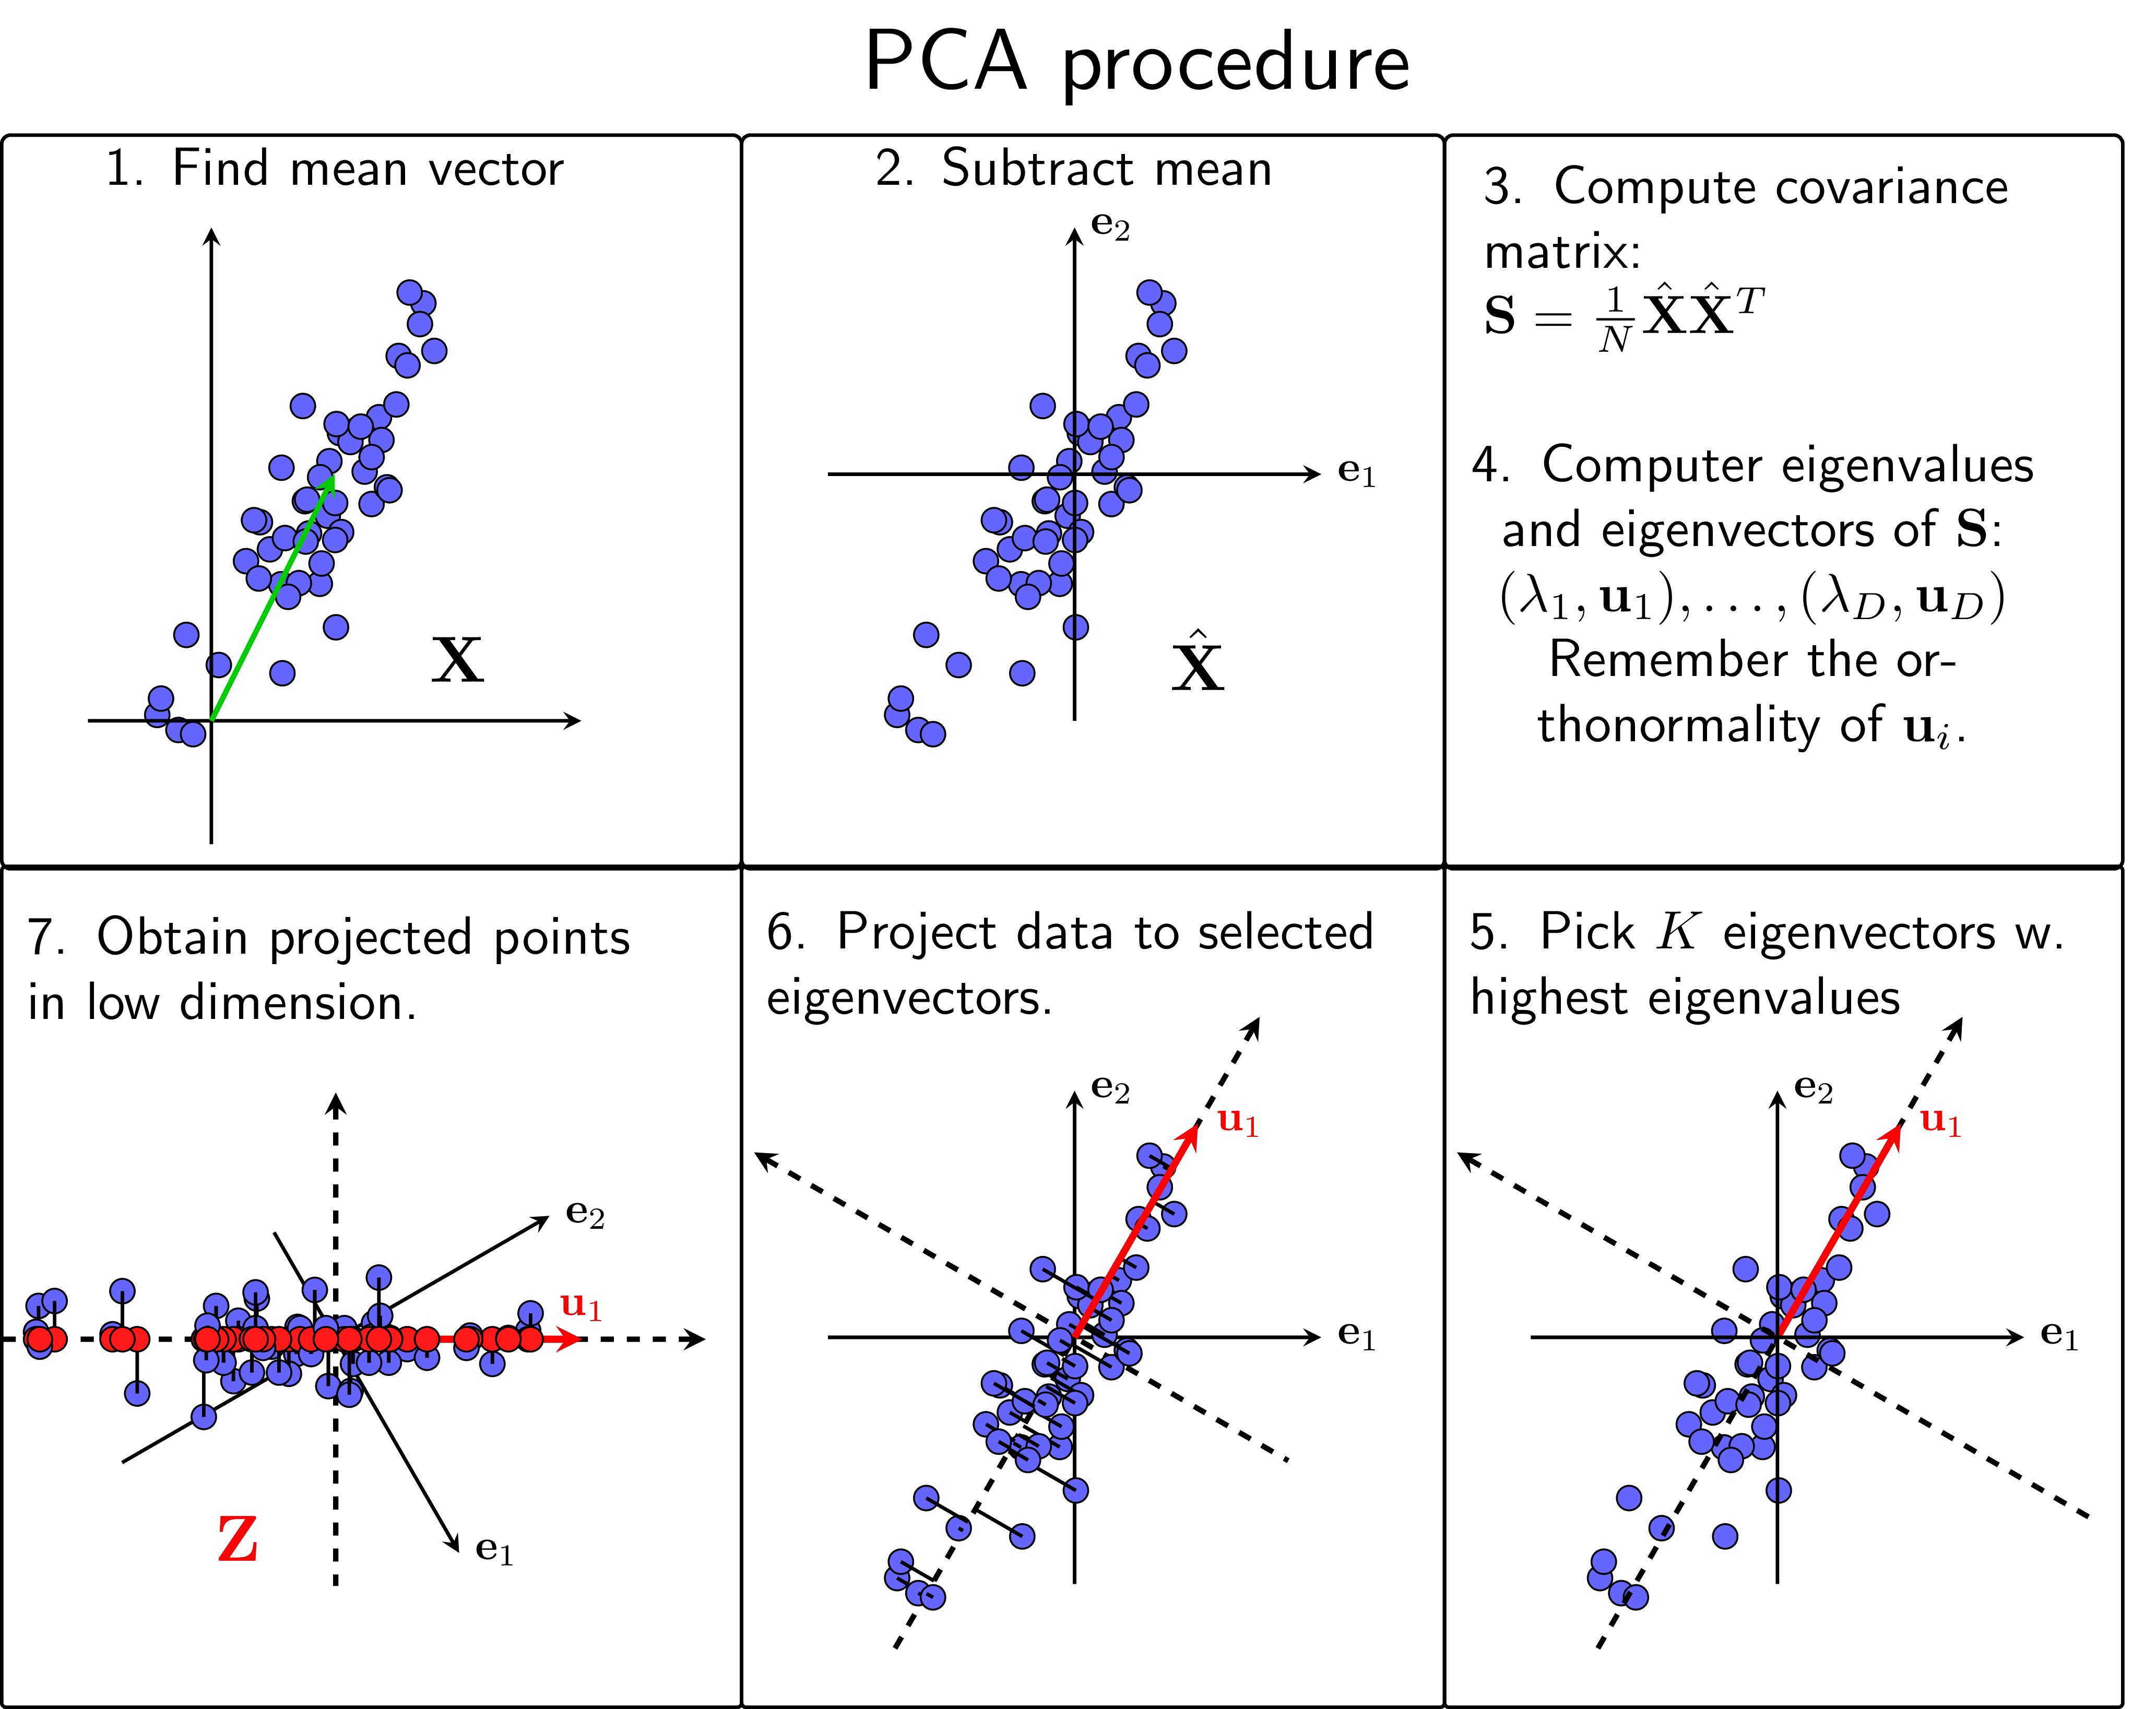

###### Principal Component Analysis - Part 2
1. PCA and SVD
    - SVD cho bài toán approximate low-rank tốt nhất
2. cách chọn dimnension cho new data 
3. PCA trong các bài toán (problems) thực tế 
    - no. dimensions > no. data points 
        - chuẩn hoá (normalize) eigenvectors 
    - large-scale problems 

SVD: Singular Value Decomposition: phân rã đơn trị 

Root: nghiệm của phương trình
    
Linear equation / first degree equation: phương trình bậc nhất 
    
Index form: dạng số mũ 
    
Eigenspace (E): the set of all eigenvectors of T corresponding to the same eigenvalue, together with the zero vector, is called an eigenspace, or the characteristic space of T.

Given a particular eigenvalue λ of the n by n matrix A, define the set E to be all vectors v: $E = \{v :(A - \lambda I) v = 0\}$

So, the set E is the union of the zero vector with the set of all eigenvectors of A associated with λ, and E equals the nullspace of the matrix $(A-\lambda I)$.
    
1.1. SVD for low-rank approximation problem tốt nhất.

Root A của 1 bài toán xấp xỉ 1 matrix bởi 1 matrix khác có rank < k: $min_A ||X - A||_F$ (1) s.t. rank(A) = K

chính là Truncated SVD của A. Nếu SVD của $X \in R^{DxN}$ là $X = U \Sigma V^T$ with $U \in R^{DxD}$ and $V \in R^{NxN}$: orthogonal matrices, and $\Sigma \in R^{DxN}$: diagonal matrix (không nhất thiết vuông) với elements trên đường chéo không âm giảm dần, nghiệm của bài toán (1): $A = U_K \Sigma_K V_K^T$ (2)

with $U \in R^{DxK}$ and $V \in R^{NxK}$: matrices tạo bở K cột đầu tiên của U và V, và $\Sigma_K \in R^{KxK}$: ma trận đường chéo con ứng với K hàng đầu tiên và K cột đầu tiên của $\Sigma$

1.2. PCA 
PCA là bài toán tìm orthogonal matrix U và matrix mô tả dữ liệu ở space thấp chiều Z sao cho việc xấp xỉ sau là tốt nhất: $X \approx \bar X = U_K Z + \bar U_K \bar U^T_K \bar x 1^T$ (3)

with $U_K, \bar U_K$: matrices created by K first columns and D-K last columns of the orthogonal matrix U, and $\bar x$: expected vector

Assume $\bar x = 0$, (3) <=> $X \approx \bar X = U_K Z$

Bài toán tối ưu (optimization problem) của PCA: $U_K,Z = min_{U_K,Z} ||X - U_K Z||_F$ (5) s.t.: $U^T_K U_K = I_K$

with $I_K \in R^{KxK}$: Identity matrix in space of K dimensions, điều kiện là columns của $U_K$ tạo thành orthonormal basis.

1.3. Relationship between PCA and SVD 

Nghiệm (root) của (5): $U_K in (5) = U_K in (2)$ and $Z in (5) = \Sigma_K V^T_K in (2)$

If data points are presented by columns in a matrix, and average per column = 0 (expected vector = 0), nghiệm của bài toán PCA rút trực tiếp từ Truncated SVD của matrix đó. In other word, root của PCA là 1 special case of bài toán Matrix Factorization giải bằng SVD 

2. Làm thế nào để chọn dimension của new data 
How to choose giá trị K-dimensions của new data với từng differnt data types?

Solution: dựa trên lượng thông tin muốn giữ lại. Vì PCA là phương pháp tối đa tổng variance được giữ lại. Với variance càng lớn, tức data có độ phân tán cao, thể hiện lượng thông tin càng lớn. 

Trong mọi hệ trục toạ độ, sum(variance) là như nhau và = sum(eigenvalues) of covariance matrix $\sum^D_{i=1} \lambda_i$. Thêm nữa, PCA giúp giữ lại lượng thông tin (sum of variances): $\sum^K_{i=1} \lambda_i$. Vậy có thể coi: $r_K = \frac{\sum^K_{i=1}\lambda_i}{\sum^D_{j=1}\lambda_j}$ (6)    là lượng thông tin được giữ lại khi no. dimensions mới sau PCA là K.

Giả sử ta muốn giữ lại 99% data, ta chỉ cần chọn K là natural number nhỏ nhất sao cho $r_K \ge$ 0.99

Khi data phân bố quanh 1 không gian con, variances lớn nhất ứng với các $\lambda_i$ đầu tiên lớn hơn nhiều so với variances còn lại. Khi đó, ta có thể chọn được K khá nhỏ để đạt được $r_K \ge 0.99$

3. PCA trong các bài toán thực tế

Case 1 - lượng data nhỏ hơn rất nhiều so với no. dimensions

Case 2 - lượng data trong tập training rất lớn, có thể cả triệu.

Both cases, việc tính toán covariance matrix và eigenvalue đôi khi trở nên bất khả thi. 

Trong mục này, ta coi data được chuẩn hoá (normalization), tức đã được trừ đi 'mean'. Khi đó, covariance matrix: $S = \frac{1}{N}XX^T$ 

3.1. no. dimensions > no. data points (D > N)

Tức matrix X là 1 matrix 'cao', khi đó, no. (eigen values $\ne$ 0) của covariance matrix S không vượt quá rank của nó, tức không vượt quá N. Vậy ta cần chọn $K \le N$ vì không thể chọn ra K > N eigenvalues $\ne$ 0 của 1 matrix có rank = N 

Sử dụng 2 tính chất sau để tính eigenvalues, eigenvectors: 

Tính chất 1: eigenvalue của A cũng là eigenvalue của kA với $k \ne 0$

Tính chất 2: eigenvalue của AB cũng là eigenvalue của BA với $A \in R^{d_1xd_2}, B \in R^{d_2xd_1}$ là matrices bất kì và $d_1, d_2$: any natural number $\ne$ 0

Như vậy, thay vì tìm eigenvalue của covariance matrix $S \in R^{DxD}$, ta tìm eigenvalue của matrix $T = X^T X \in R^{NxN}$ có số chiều nhỏ hơn (vì N < D)

Tính chất 3: giả sử $(\lambda,u)$ là 1 cặp eigenvalue - eigenvector của T, vậy $(\lambda,Xu)$ là 1 cặp eigenvalue - eigenvector của S. Vậy: $X^TXu = \lambda u$ (7) => $(XX^T)(Xu) = \lambda X u$ (8)

(7) là theo định nghĩa của eigenvalue và eigenvector. (8): nhân 2 vế với matrix X. Từ đó có tính chất 3. 

Như vậy eigenvalue và eigenvector của covariance matrix có thể tính được dựa trên 1 matrix nhỏ hơn.

3.2. chuẩn hoá (normalize) eigenvectors

Eigenspace ứng với eigenvalue của 1 matrix là không gian sinh (span subspace) tạo bởi all eigenvectors ứng với eigenvalue đó.

Chuẩn hoá eigenvector tìm được sao cho chúng tạo thành 1 orthonormal basis. Việc này có thể dựa vào 2 điểm:

Thứ nhất, if A is a symmetric matrix, $(\lambda_1,x_1)(\lambda_2,x_2)$: pairwise eigenvalue - eigenvector of A with $\lambda_1 \ne \lambda_2$, thì $x^T_1x_2 = 0$. In other words, 2 vector bất kỳ trong 2 eigenspace khác nhau của 1 symmetric matrix thì trực giao (orthogonal) với nhau.

$x^T_2Ax_1 = x^T_1Ax_2 = \lambda_1x^T_2x_1 = \lambda_2x^T_1x_2 => x^t_1x_2 = 0$ when $\lambda_1 \ne \lambda_2$

Thứ hai, as independent eigenvalues found in a eigenspace, dùng Gram-Schmit process để chuẩn hoá (normalize) chúng về một hệ trực chuẩn (orthonormal basis).

Kết hợp hai điểm trên, ta có thể thu được eigenvalues tạo thành một orthonormal basis, chính là $U_K$ in PCA

3.3. các bài toán large-scale (large-scale problems)

Trong rất nhiều bài toán, cả D và N đều là các số rất lớn, đồng nghĩa với việc ta phải tìm eigenvalue cho một ma trận rất lớn.

Ví dụ, có 1 triệu bức ảnh 1000 x 1000 pixel, $D = N = 10^6$ là một số rất lớn, việc trực tiếp tính toán eigenvalue và eigenvector cho covariance matrix là không khả thi. 

Power Method: phương pháp cho phép tính xấp xỉ các giá trị này một cách nhanh hơn, tìm được pairwise eigenvalue và eigenvector đầu tiên của 1 positive semi-definite matrix $A \in R^{nxn}$.

1. choose 1 vector $q^{(0)} \in R^n, ||q^{(0)}||_2 = 1$ bất kỳ
2. Với k=1,2,…, tính: $z = Aq^{(k-1)}$
3. normalize $q^{(k)} = z/||z||_2$
4. If $||q^{(k)} - q^{(k-1)}||_2$ đủ nhỏ thì dừng lại. Nếu không, k:=k+1 rồi quay lại Bước 2

$q^{(k)}$: eigenvector ứng với eigenvalue lớn nhất $\lambda_1 = (q^{(k)})^T Aq^{(k)}$

Để tìm eigenvector và eigenvalue thứ hai của matrix A, chúng ta dựa trên định lý: if the positive semi-definite matrix A has eigenvalues $\lambda_1 \ge \lambda_2 \ge ... \ge \lambda_n (\ge 0)$ and corresponding eigenvectors $v_1,...,v_n$, and those eigenvectors form a orthonormal basis, then matrix: $B = A - \lambda_1 v_1 v^T_1$ has eigenvalues $\lambda_2 \ge \lambda_3 \ge...\ge \lambda_n \ge 0$ and corresponding eigenvectors $v_2, v_3,...,v_n,v_1$

Chứng minh:

- Với i = 1: $Bv_1 = (A - \lambda_1 v_1 v^T_1)v_1 = Av_1 - \lambda_1 v_1 = 0$
- Với i > 1: $Bv_i = (A - \lambda_1 v_1 v^T_1)v_i = Av_i - \lambda_1v_1(v^T_1v_i) = Av_i - \lambda_iv_i$

Như vậy định lý đã được chứng minh.

Lúc này, $(\lambda_2,v_2)$ lại trở thành pairwise eigenvalue, eigenvector lớn nhất của B. Cách tìm hai biến số này một lần nữa được thực hiện bằng Phương pháp Power.

Tiếp tục quy trình này, ta sẽ tìm được (xấp xỉ) tất cả corresponding eigenvalues and eigenvectors of covariance matrix. Cũng xin lưu ý rằng ta chỉ cần tìm tới eigenvalue thứ K của ma trận hiệp phương sai. Cách làm này trên thực tế được sử dụng rất nhiều.

##### Example in Python
###### Eigenface
Eigenface: one of the most popular methods trong bài toán nhận dạng khuôn mặt. Ý tưởng của Eigenface là đi tìm 1 space có no. dimensions nhỏ hơn để mô tả mỗi khuôn mặt, từ đó sử dụng vector trong không gian thấp này như là feature vector cho việc thực hiện classification. Điều đáng nói là một bức ảnh khuôn mặt có kích thước khoảng 200 × 200 sẽ có no. dimensions là 40,000 - là một số cực lớn, trong khi đó, feature vector thường chỉ có no. dimensions bằng vài trăm.

Eigenface thực ra chính là PCA. Các Eigenfaces chính là các eigenvectors ứng với largest eigenvalues of covariance matrix.

Trong phần này, chúng ta cùng làm một thí nghiệm nhỏ trên cơ sở dữ liệu Yale face database. Các bức ảnh trong thí nghiệm này đã được căn chỉnh cho cùng với kích thước và khuôn mặt nằm trọn vẹn trong một hình chữ nhật có kích thước 116 x 98 pixel. Có tất cả 15 người khác nhau, mỗi người có 11 bức ảnh được chụp ở các điều kiện ánh sáng và cảm xúc khác nhau, bao gồm: ‘centerlight’, ‘glasses’, ‘happy’, ‘leftlight’, ‘noglasses’, ‘normal’, ‘rightlight’,’sad’, ‘sleepy’, ‘surprised’, và ‘wink’.

Kích thước 116 x 98 pixel => no. dimensions = 116 x 98 = 11,368 à một số khá lớn. Tuy nhiên, vì chỉ có tổng cộng 15 x 11 = 165 bức ảnh nên ta có thể nén các bức ảnh này về dữ liệu mới có no. dimensions < 165. Trong ví dụ này, tôi chọn K = 100

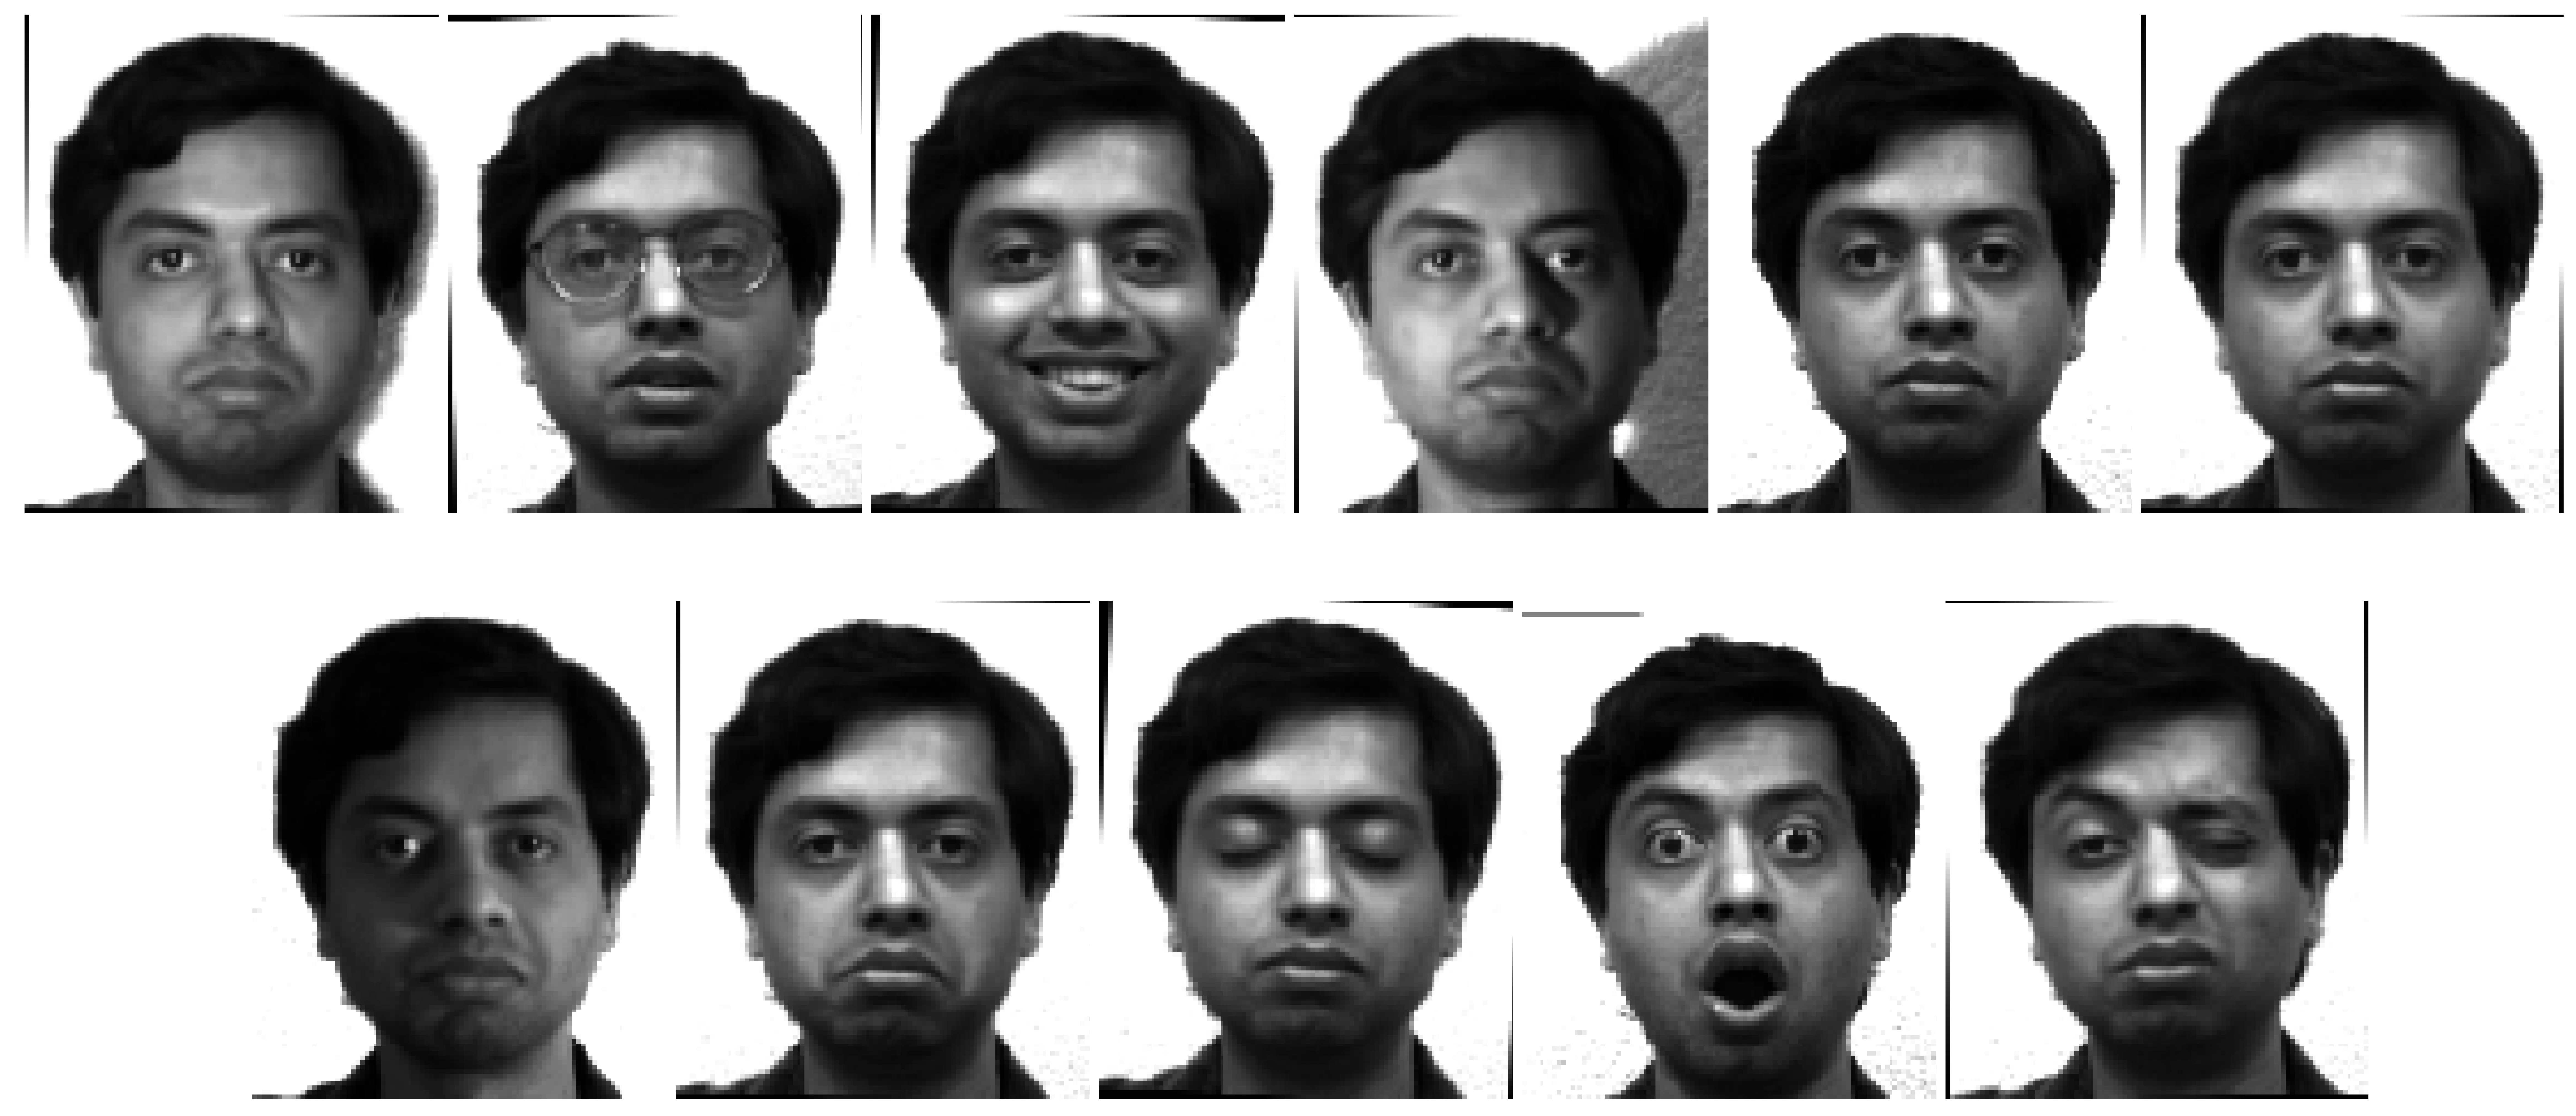
Hình 1: Ví dụ về ảnh của một người trong Yale Face Database.

In [ ]:
import numpy as np
from scipy import misc   # for loading image

# filename structure
path = 'unpadded'  # path to the database
ids = range(1, 16) # 15 persons
states = ['centerlight', 'glasses', 'happy', 'leftlight',
          'noglasses', 'normal', 'rightlight','sad',
          'sleepy', 'surprised', 'wink']                  # 11 states
prefix = 'subject'
suffix = '.pgm'

height = 116
width = 98
# data dimensions
D = h * w

# no. images
N = len(states) * 15  
K = 100

# collect all data
shape = (D, N)
X = np.zeros(shape)
cnt = 0
for person_id in range(1, 16):
    for state in states:
        fn = path + prefix + str(person_id).zfill(2) + '.' + state + suffix
        X[:, cnt] = misc.imread(fn).reshape(D)
        cnt += 1

# doing PCA, note that each row is a datapoint
from sklearn.decomposition import PCA 

pca = PCA(n_components = K)
pca.fit(X.T)

# projection matrix
U = pca.components_.T

Chú ý rằng các hàm của sklearn đều chọn dữ liệu ở dạng row. Còn tôi thường chọn dữ liệu ở dạng column cho thuận tiện trong biểu diễn toán học. Trước khi sử dụng sklearn, chú ý (transpose) chuyển vị ma trận dữ liệu.

Hình 2: Các eigenfaces tìm được bằng PCA.

Có một điều dễ nhận ra là các ảnh minh hoạ các vector thu được ít nhiều mang thông tin của mặt người. Thực tế, một khuôn mặt gốc sẽ được xấp xỉ như tổng có trọng số của các khuôn mặt này. Vì các vector riêng này đóng vai trò như cơ sở của không gian mới với ít chiều hơn, chúng còn được gọi là khuôn mặt riêng (eigenfaces)

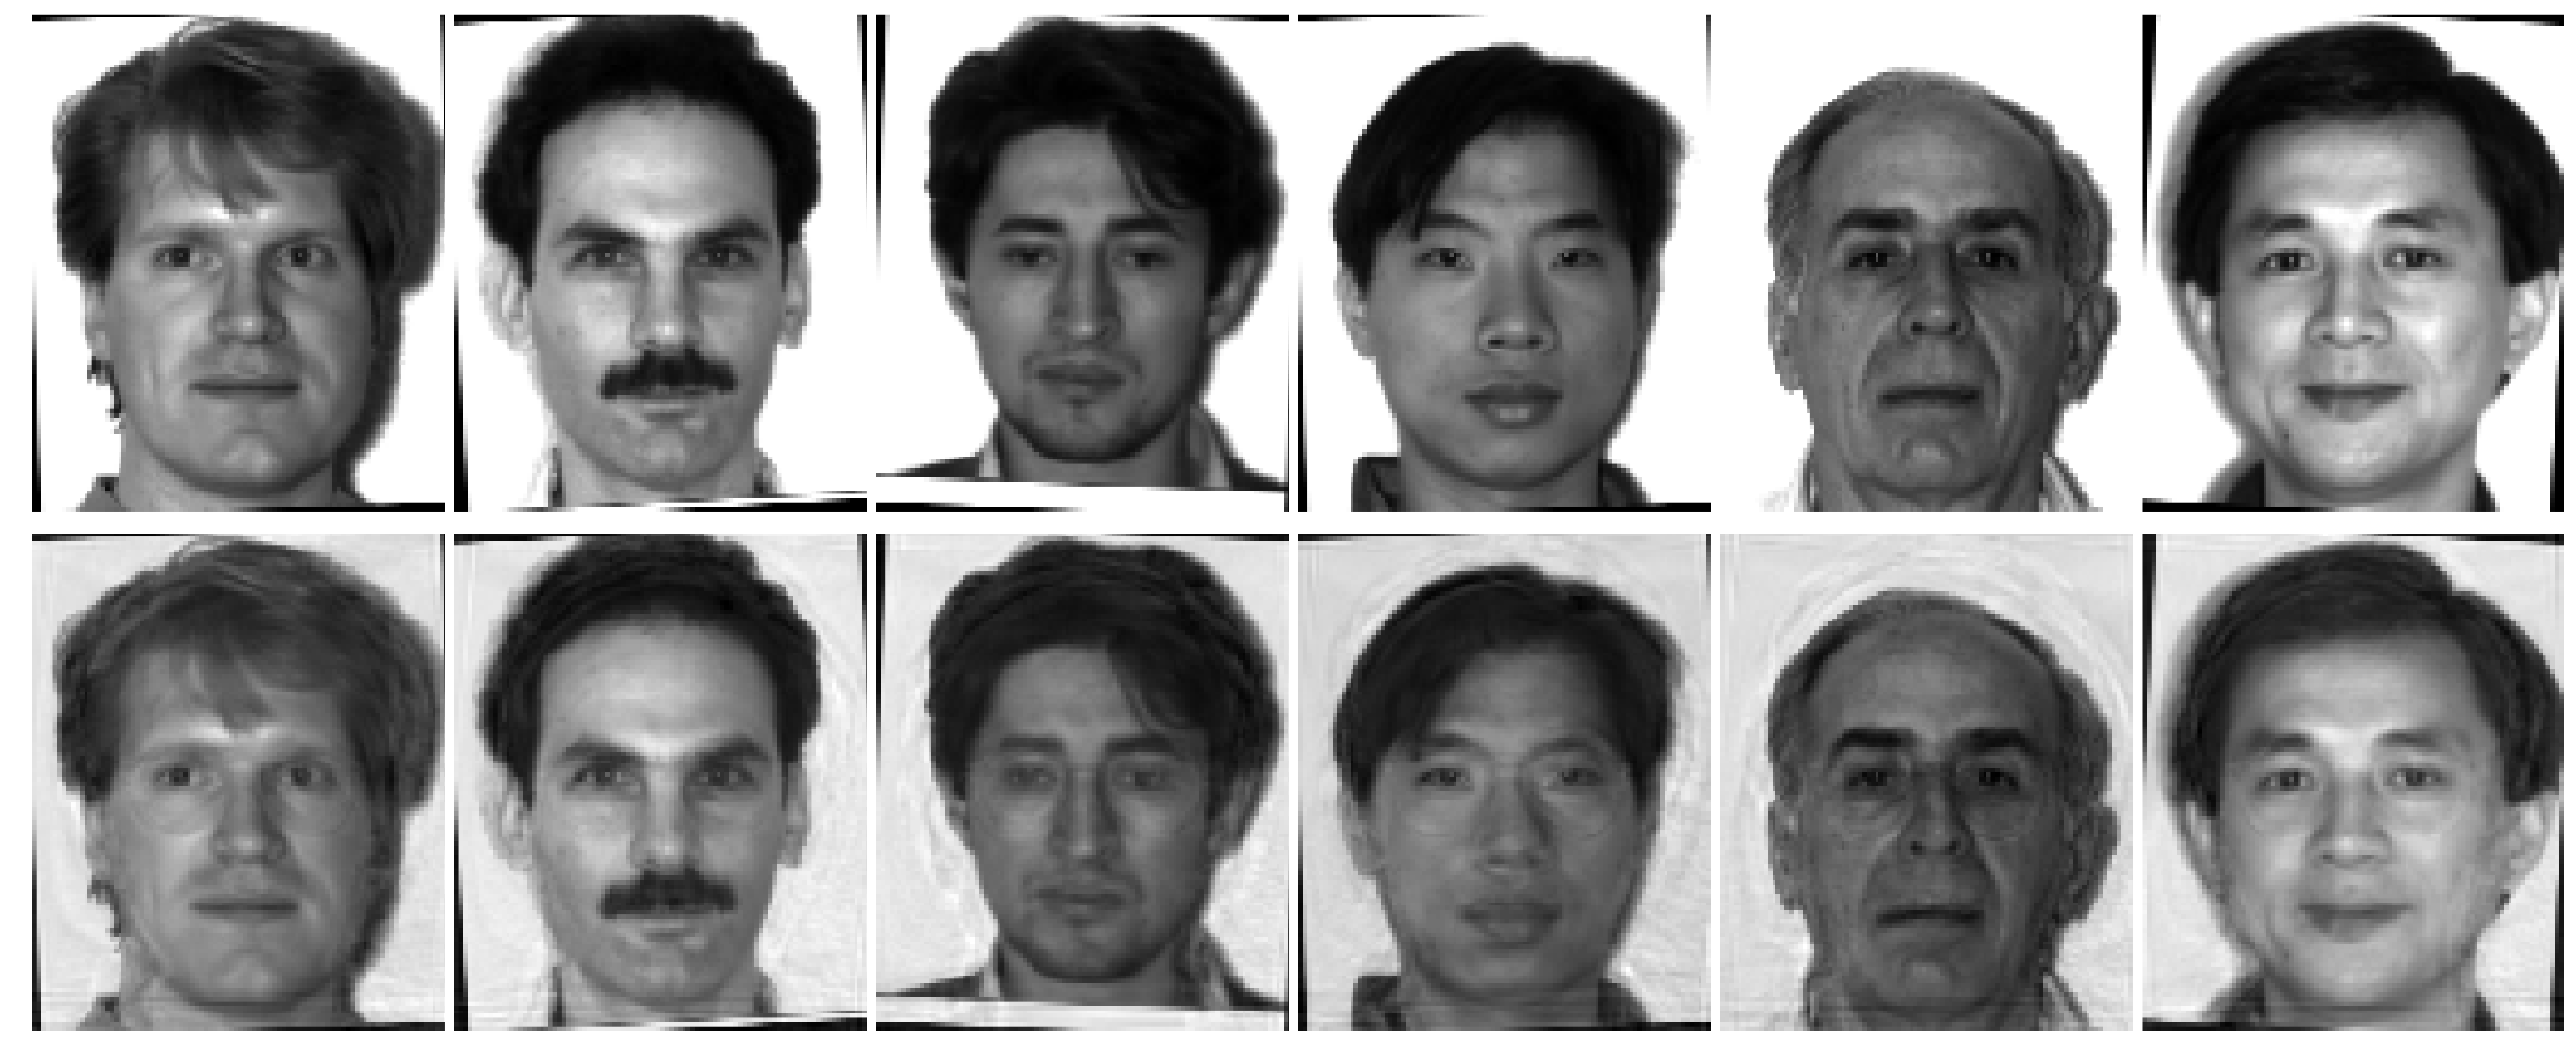

Hình 3: Hàng trên: các ảnh gốc. 

Hàng dưới: các ảnh được suy ra từ eigenfaces. Ảnh ở hàng dưới có nhiều nhiễu nhưng vẫn mang những đặc điểm riêng mà mắt người có thể phân biệt được.

Như vậy, vector với số chiều K = 100 trong không gian mới mang khá đầy đủ thông tin của vector có số chiều D = 11,368 trong không gian ban đầu.

Phần còn lại của source code: https://github.com/tiepvupsu/tiepvupsu.github.io/blob/master/assets/28_pca2/python/EigenFaces.ipynb

###### Unsupervised Abnormal Detection
Ngoài các ứng dụng về nén và classification, PCA còn được sử dụng trong nhiều lĩnh vực khác nhau. Abnormal Detection (dò tìm các hiện tượng không bình thường) là một trong số đó. Thêm nữa, giả sử chúng ta không biết nhãn của các sự kiện này, tức ta đang làm việc với một bài toán Unsupervised.

Ý tưởng: 
- các sự kiện ‘normal’ thường nằm gần một không gian con nào đó
- các sự kiện ‘abnormal’ thường nằm xa không gian con đó. 
- vì là ‘abnormal’ nên số lượng các sự kiện thuộc loại này là rất nhỏ so với ‘normal’.

Làm PCA trên toàn bộ dữ liệu để tìm ra các thành phần chính của dữ liệu, từ đó suy ra không gian con mà các điểm ‘normal’ nằm gần. Việc xác định một điểm là ‘normal’ hay ‘abnoral’ được xác định bằng cách đo khoảng cách từ điểm đó tới không gian con tìm được.

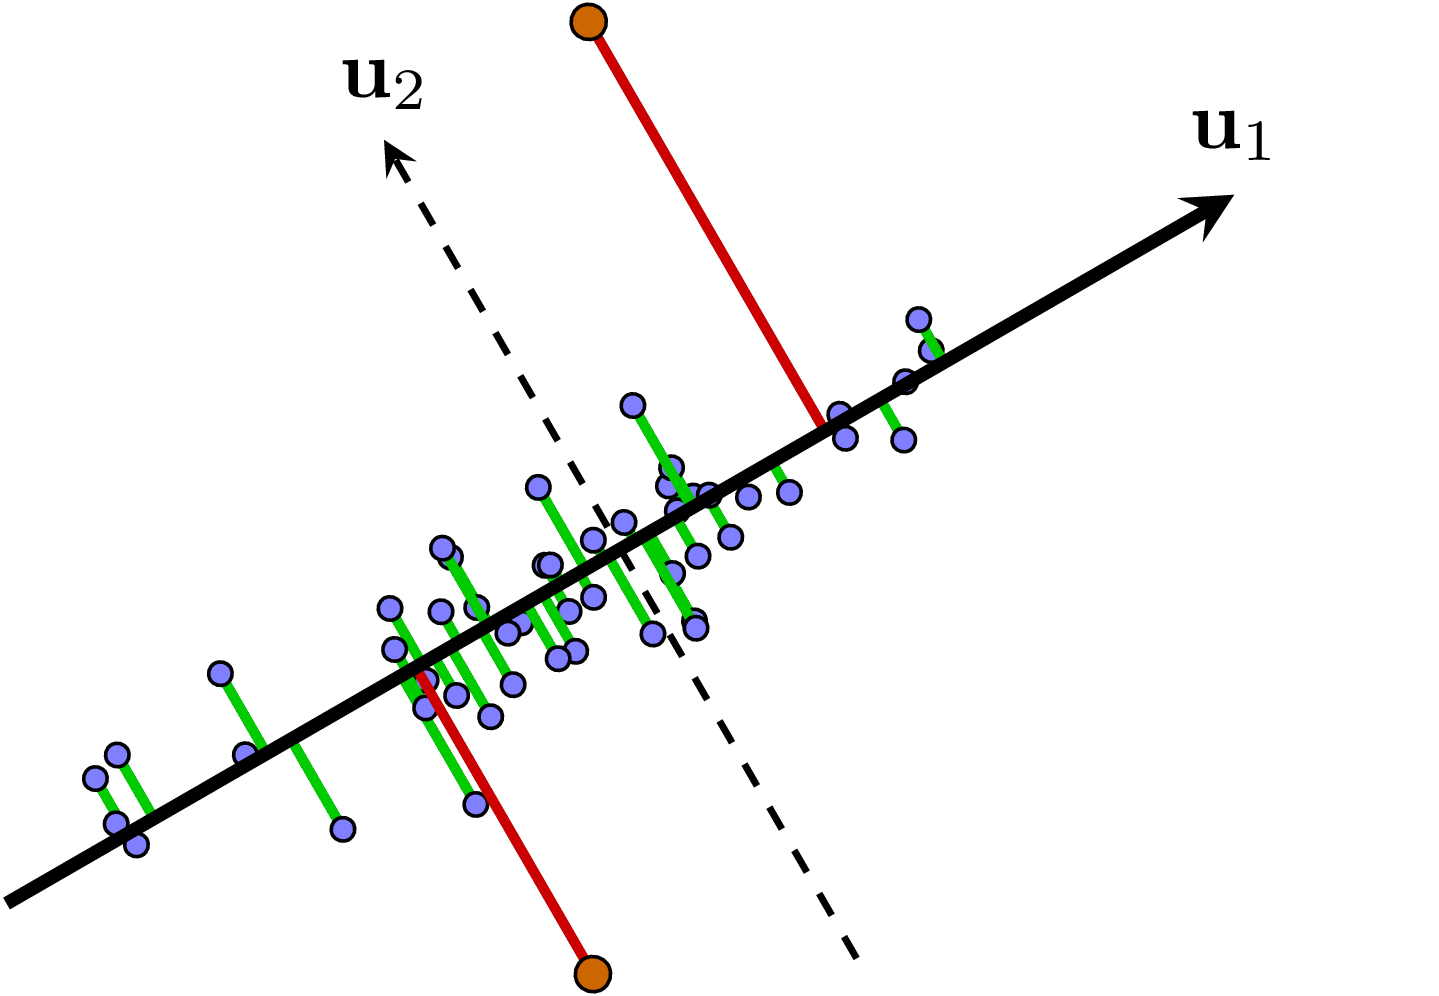

Các điểm quá xa không gian con này, là các điểm màu cam, có thể được coi là các sự kiện 'abnormal'.

PCA là một phương pháp Unsupervised. 

Việc thực hiện PCA trên toàn bộ dữ liệu không phụ thuộc vào class(nếu có) của mỗi dữ liệu. 

Việc này đôi khi khiến cho PCA không mang lại hiệu quả cho các bài toán classification.

Thật vậy, giả sử trong không gian hai chiều, 2 classes phân bố dọc hai bên của 1 đường thẳng. 

Như vậy, PCA nhiều khả năng sẽ cho chúng ta giữ lại thành phần chính chính là đường thẳng đó. Khi chiếu dữ liệu lên đường thẳng này, cả hai classes bị trộn lẫn vào nhau, khiến cho việc classification đạt kết quả thấp. 

Có một phương pháp tương tự như PCA giúp tận dụng thông tin về các class để xác định chiếu theo chiều nào, phương pháp đó có tên là Linear Discriminant Analysis.

Với các bài toán Large-scale, đôi khi việc tính toán trên toàn bộ dữ liệu là không khả thi vì còn có vấn đề về bộ nhớ. 

Giải pháp là thực hiện PCA lần đầu trên một tập con dữ liệu vừa với bộ nhớ, sau đó lấy một tập con khác để (incrementally) cập nhật nghiệm của PCA tới khi nào hội tụ. Ý tưởng này khá giống với Mini-batch Gradient Descent, và được gọi là Incremental PCA.